In [7]:
library("tidyverse")
library(reshape)
library(ggbeeswarm)
library("tidyr")
library("ggplot2")
library("reshape2")
library("dplyr")
library("ggpubr")
theme_set(theme_bw(base_size = 10)) 


SE <- function(values){
    se = sd(values) / sqrt(length(values))
    return (se)
}

CI <- function(values){
    t = qt((1-0.05)/2 + 0.5, length(values)-1)
    ci = t*SE(values)
    return (as.numeric(ci))
}
options(repr.matrix.max.rows=200, repr.matrix.max.cols=200)

In [8]:

percent= '70'
cutoff = 7


In [ ]:
#Ped (trio) that are used for analysis, after sample filtration (kindships, contamination, and Poission)
ped = read.delim('NTD_WES_DNM.FixedSample.PoiFil.ped',sep='\t')


# PLI scores
oe = read.delim('/projects/ps-gleesonlab8/User/hiyoothere/NTD/WorkFlow/Others/gnomad.v2.1.1.lof_metrics.by_gene.txt')
colnames(oe)[1] = "SYMBOL"
dim(oe)
oe = oe[!duplicated(oe$SYMBOL), ]
head(oe)
oe$gene = factor(oe$SYMBOL, levels=oe$SYMBOL)
oe = oe[, c(1,10,21,22,23,24,29,30)]
oe_unique <- unique(oe)


#DNM all 
data.all = read.delim("NTD_WES_DNM.FixedSample.PoiFil.den_input", header = TRUE)
paste("Total DNM number:", dim(data.all)[1])
#DNM in consensus region
data.con = read.delim(paste("NTD_WES_DNM.FixedSample.C",percent,".PoiFil.den_input", sep=""), header = TRUE)
paste("DNMs in consensus:", dim(data.con)[1])

#FIL
data.con <- left_join(data.con, batch, by = "pro")
dim(data.con)

##add pli
dim(data.con)
data.con <- left_join(data.con, oe_unique, by= 'SYMBOL')

data.all <- left_join(data.all, fa, by = "family")
data.con <- left_join(data.con, fa, by = "family")
head(data.all)

## Clean the vep annotation terms

In [ ]:
data.fil <- data.con

data.fil$Consequence[grepl("stop_gain", data.fil$Consequence)] <- "stop_gain"
data.fil$Consequence[grepl("stop_lost", data.fil$Consequence)] <- "stop_lost"
data.fil$Consequence[grepl("start_lost", data.fil$Consequence)] <- "start_lost"
data.fil$Consequence[grepl("inframe_deletion", data.fil$Consequence)] <- "inframe_deletion"
data.fil$Consequence[grepl("inframe_insertion", data.fil$Consequence)] <- "inframe_insertion"
data.fil$Consequence[grepl("splice_acceptor_variant", data.fil$Consequence)] <- "splice_acceptor_variant"
data.fil$Consequence[grepl("splice_donor_variant", data.fil$Consequence)] <- "splice_donor_variant"
data.fil$Consequence[grepl("missense", data.fil$Consequence)] <- "missense_variant"
data.fil$Consequence[grepl("synonymous", data.fil$Consequence)] <- "synonymous_variant"


coding_term = c('frameshift_variant', 'inframe_deletion', 'inframe_insertion', 
                'synonymous_variant', 'missense_variant', 
                'splice_acceptor_variant', 'splice_donor_variant', 
                'start_lost', 
                'stop_gained', 'stop_lost', 'stop_retained_variant', "protein_altering_variant")

In [12]:
head(data.fil)

,locus,ref,alt,family,pro,dad,mom,pro_sex,pro_DP,pro_ref,pro_alt,pro_GT,pro_GQ,dad_DP,dad_ref,dad_alt,dad_GT,dad_GQ,mom_DP,mom_ref,mom_alt,mom_GT,mom_GQ,p_denovo,confidence,MQ,QD,filter,Allele,Consequence,IMPACT,SYMBOL,Gene,Feature_type,Feature,BIOTYPE,EXON,INTRON,HGVSc,HGVSp,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,DISTANCE,STRAND,FLAGS,VARIANT_CLASS,SYMBOL_SOURCE,HGNC_ID,CANONICAL,MANE_SELECT,MANE_PLUS_CLINICAL,TSL,APPRIS,CCDS,ENSP,SWISSPROT,TREMBL,UNIPARC,UNIPROT_ISOFORM,GENE_PHENO,SIFT,PolyPhen,DOMAINS,miRNA,HGVS_OFFSET,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF,AA_AF,EA_AF,gnomAD_AF,gnomAD_AFR_AF,gnomAD_AMR_AF,gnomAD_ASJ_AF,gnomAD_EAS_AF,gnomAD_FIN_AF,gnomAD_NFE_AF,gnomAD_OTH_AF,gnomAD_SAS_AF,MAX_AF,MAX_AF_POPS,CLIN_SIG,SOMATIC,PHENO,PUBMED,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,TRANSCRIPTION_FACTORS,CADD_phred,DisGeNET,MPC,MTR,Mastermind,MetaSVM_pred,MetaSVM_rankscore,Phenotypes,Polyphen2_HDIV_score,SIFT_pred,SplicAI,SpliceRegion,gnomAD_exomes_AC,gnomAD_exomes_AF,gnomAD_exomes_AN,pLI.x,pLI_values,occurence,probands,DP_filter12,pval,Inspected,batch.x,oe_mis_pphen.x,pLI.y,pNull.x,pRec.x,oe_lof.x,oe_lof_lower.x,oe_lof_upper.x,batch.y,batch,oe_mis_pphen.y,pLI,pNull.y,pRec.y,oe_lof.y,oe_lof_lower.y,oe_lof_upper.y,pro_dob,fa_AoC,mo_AoC,fa_dob,mo_dob,pro_FA
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<lgl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<chr>,<chr>,<int>,<chr>,<lgl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>
1,chr1:1290349,G,A,12111,12111.s1,12111.fa,12111.mo,2,33,19,14,0/1,99,40,40,0,0/0,76,40,40,0,0/0,67,.,hiConfDeNovo,60.00,11.4,PASS,A,downstream_gene_variant,MODIFIER,ACAP3,ENSG00000131584,Transcript,ENST00000492936,retained_intron,,,,,,,,,,,2041,-1,,SNV,HGNC,HGNC:16754,,,,1,,,,,,,,NA,,,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,,,,,,NA,NA,NA,NA,NA,NA,,,,,,NA,,,,,,NA,NA,NA,,,1,12111.s1,TRUE,0.4868502,NA,SSC,0.53448,4.4135e-06,1.4907e-05,0.99998000,0.39045,0.266,0.586,SSC,SSC,0.53448,4.4135e-06,1.4907e-05,0.99998000,0.39045,0.266,0.586,2000,29,26,1971,1974,None
2,chr1:1486163,G,C,7004,4926035813,2917406449,3160220249,1,64,30,34,0/1,99,43,43,0,0/0,88,44,44,0,0/0,91,.,hiConfDeNovo,59.68,16.27,PASS,C,missense_variant,MODERATE,ATAD3B,ENSG00000160072,Transcript,ENST00000673477,protein_coding,10/16,,ENST00000673477.1:c.1017G>C,ENSP00000500094.1:p.Lys339Asn,1137,1017,339,K/N,aaG/aaC,COSV58019127,NA,1,,SNV,HGNC,HGNC:24007,YES,NM_031921.6,,NA,P1,CCDS30.1,ENSP00000500094,Q5T9A4.154,,UPI000013E044,Q5T9A4-1,NA,deleterious(0),possibly_damaging(0.824),AFDB-ENSP_mappings:AF-Q5T9A4-F1.A,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,,,1,1,,NA,NA,NA,NA,NA,23.7,invalid_field,invalid_field,invalid_field,invalid_field,D,0.94306,invalid_field,0.955,D,invalid_field,invalid_field,NA,NA,NA,invalid_field,invalid_field,1,4926035813,TRUE,0.7079808,NA,UCI,1.34320,1.0032e-22,9.9972e-01,0.00027792,1.09950,0.829,1.477,UCI,UCI,1.34320,1.0032e-22,9.9972e-01,0.00027792,1.09950,0.829,1.477,NA,NA,NA,NA,NA,NA
3,chr1:9356429,G,A,6144,7350647467,2898643437,4401829860,1,154,76,78,0/1,99,33,33,0,0/0,76,33,33,0,0/0,76,.,hiConfDeNovo,60.00,9.72,PASS,A,missense_variant,MODERATE,SPSB1,ENSG00000171621,Transcript,ENST00000450402,protein_coding,2/2,,ENST00000450402.1:c.538G>A,ENSP00000409235.1:p.Ala180Thr,75

In [14]:


callable= read.delim("callable_family_DP12_220826.clean.txt", header = FALSE)
colnames(callable) = c("family_dirty", "callable", "batch", "affected", "family", "pro")
paste("callable")
head(callable)


head(data.fil)



[1] "callable"

,family_dirty,callable,batch,affected,family,pro
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,101,65162766,Kibar,affected,101,S12816
2,103_S14383,78872610,Kibar,affected,101,S14383
3,103_S14386,79120866,Kibar,affected,101,S14386
4,11000,47881923,SSC,unaffected,11000,11000.s1
5,11002,55431363,SSC,unaffected,11002,11002.s1
6,11003,62732391,SSC,unaffected,11003,11003.s1


,locus,ref,alt,family,pro,dad,mom,pro_sex,pro_DP,pro_ref,pro_alt,pro_GT,pro_GQ,dad_DP,dad_ref,dad_alt,dad_GT,dad_GQ,mom_DP,mom_ref,mom_alt,mom_GT,mom_GQ,p_denovo,confidence,MQ,QD,filter,Allele,Consequence,IMPACT,SYMBOL,Gene,Feature_type,Feature,BIOTYPE,EXON,INTRON,HGVSc,HGVSp,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,DISTANCE,STRAND,FLAGS,VARIANT_CLASS,SYMBOL_SOURCE,HGNC_ID,CANONICAL,MANE_SELECT,MANE_PLUS_CLINICAL,TSL,APPRIS,CCDS,ENSP,SWISSPROT,TREMBL,UNIPARC,UNIPROT_ISOFORM,GENE_PHENO,SIFT,PolyPhen,DOMAINS,miRNA,HGVS_OFFSET,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF,AA_AF,EA_AF,gnomAD_AF,gnomAD_AFR_AF,gnomAD_AMR_AF,gnomAD_ASJ_AF,gnomAD_EAS_AF,gnomAD_FIN_AF,gnomAD_NFE_AF,gnomAD_OTH_AF,gnomAD_SAS_AF,MAX_AF,MAX_AF_POPS,CLIN_SIG,SOMATIC,PHENO,PUBMED,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,TRANSCRIPTION_FACTORS,CADD_phred,DisGeNET,MPC,MTR,Mastermind,MetaSVM_pred,MetaSVM_rankscore,Phenotypes,Polyphen2_HDIV_score,SIFT_pred,SplicAI,SpliceRegion,gnomAD_exomes_AC,gnomAD_exomes_AF,gnomAD_exomes_AN,pLI.x,pLI_values,occurence,probands,DP_filter12,pval,Inspected,batch.x,oe_mis_pphen.x,pLI.y,pNull.x,pRec.x,oe_lof.x,oe_lof_lower.x,oe_lof_upper.x,batch.y,batch,oe_mis_pphen.y,pLI,pNull.y,pRec.y,oe_lof.y,oe_lof_lower.y,oe_lof_upper.y,pro_dob,fa_AoC,mo_AoC,fa_dob,mo_dob,pro_FA
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<lgl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<chr>,<chr>,<int>,<chr>,<lgl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>
1,chr1:1290349,G,A,12111,12111.s1,12111.fa,12111.mo,2,33,19,14,0/1,99,40,40,0,0/0,76,40,40,0,0/0,67,.,hiConfDeNovo,60.00,11.4,PASS,A,downstream_gene_variant,MODIFIER,ACAP3,ENSG00000131584,Transcript,ENST00000492936,retained_intron,,,,,,,,,,,2041,-1,,SNV,HGNC,HGNC:16754,,,,1,,,,,,,,NA,,,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,,,,,,NA,NA,NA,NA,NA,NA,,,,,,NA,,,,,,NA,NA,NA,,,1,12111.s1,TRUE,0.4868502,NA,SSC,0.53448,4.4135e-06,1.4907e-05,0.99998000,0.39045,0.266,0.586,SSC,SSC,0.53448,4.4135e-06,1.4907e-05,0.99998000,0.39045,0.266,0.586,2000,29,26,1971,1974,None
2,chr1:1486163,G,C,7004,4926035813,2917406449,3160220249,1,64,30,34,0/1,99,43,43,0,0/0,88,44,44,0,0/0,91,.,hiConfDeNovo,59.68,16.27,PASS,C,missense_variant,MODERATE,ATAD3B,ENSG00000160072,Transcript,ENST00000673477,protein_coding,10/16,,ENST00000673477.1:c.1017G>C,ENSP00000500094.1:p.Lys339Asn,1137,1017,339,K/N,aaG/aaC,COSV58019127,NA,1,,SNV,HGNC,HGNC:24007,YES,NM_031921.6,,NA,P1,CCDS30.1,ENSP00000500094,Q5T9A4.154,,UPI000013E044,Q5T9A4-1,NA,deleterious(0),possibly_damaging(0.824),AFDB-ENSP_mappings:AF-Q5T9A4-F1.A,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,,,1,1,,NA,NA,NA,NA,NA,23.7,invalid_field,invalid_field,invalid_field,invalid_field,D,0.94306,invalid_field,0.955,D,invalid_field,invalid_field,NA,NA,NA,invalid_field,invalid_field,1,4926035813,TRUE,0.7079808,NA,UCI,1.34320,1.0032e-22,9.9972e-01,0.00027792,1.09950,0.829,1.477,UCI,UCI,1.34320,1.0032e-22,9.9972e-01,0.00027792,1.09950,0.829,1.477,NA,NA,NA,NA,NA,NA
3,chr1:9356429,G,A,6144,7350647467,2898643437,4401829860,1,154,76,78,0/1,99,33,33,0,0/0,76,33,33,0,0/0,76,.,hiConfDeNovo,60.00,9.72,PASS,A,missense_variant,MODERATE,SPSB1,ENSG00000171621,Transcript,ENST00000450402,protein_coding,2/2,,ENST00000450402.1:c.538G>A,ENSP00000409235.1:p.Ala180Thr,75

In [ ]:


"After removing poi-failed samples"
dim(ped)
colnames(ped) = c('family', 'sample', 'dad', 'mom', 'sex', 'V6')
ped.pro = ped[ped[, 3] != 0 & ped[, 4] != 0, ] # proband only
dim(ped.pro)

ped.small = ped.pro[ , c("family", "sample")]
head(ped.small)

#Merge with callableregion file 
head(callable)
callable <- left_join(ped.small,callable, by = 'family')
colnames(callable)[6] = 'sample'
head(callable)
callable <- callable[!duplicated(callable$sample),]
colnames(callable) <- gsub(".x", "", colnames(callable))
callable$cohort = ifelse(grepl('SSC', callable$batch), 'SSC', 'MM')
callable = callable[ , c("sample", "callable")]
head(callable)
colnames(data.fil)[5] = "sample"
colnames(ped.pro)[2] = "sample"


In [16]:

head(ped.pro)

,family,sample,dad,mom,sex,V6,NA
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>
1,101,S12816,S12818,S12817,1,2,Kibar
2,11000,11000.s1,11000.fa,11000.mo,2,2,SSC
3,11002,11002.s1,11002.fa,11002.mo,1,2,SSC
4,11003,11003.s1,11003.fa,11003.mo,2,2,SSC
5,11004,11004.s1,11004.fa,11004.mo,1,2,SSC
6,11005,11005.s1,11005.fa,11005.mo,1,2,SSC


In [ ]:
#Make new dataframe

df = data.frame(sample = factor(ped.pro$sample))
dim(df)
#Add familhy
df = merge(df, ped.pro[, c('sample', 'family', 'sex')], by.x= 'sample',by.y = 'sample', sort = F, all.x = TRUE)
head(df)
#Add Cohort
df$cohort = ifelse(grepl('s', df$sample), 'SSC', 'MM')
head(df)
dim(df)
#Add Callable region
df = merge(df, callable[, c('sample', 'callable')], by= 'sample', sort = F, all.x=TRUE)
df$callable = ifelse(is.na(df$callable), 'NA', df$callable)
dim(df)
head(df)

samplecnt.mm = as.numeric(table(df$cohort)[1])
samplecnt.mm
samplecnt.ssc = as.numeric(table(df$cohort)[2])
samplecnt.ssc

head(data.all)
colnames(data.all)[30] = "term"
colnames(data.fil)[30] = "term"

In [ ]:
#Count DNMs in categories
head(df)
head(data.fil)
All = as.data.frame(table(data.fil$sample))
Coding = as.data.frame(table(data.fil[data.fil$term %in% coding_term,]$sample))

Noncoding = as.data.frame(table(data.fil[!data.fil$term %in% coding_term,]$sample))
SNV = as.data.frame(table(data.fil[data.fil$VARIANT_CLASS == 'SNV' | data.fil$VARIANT_CLASS == 'substitution',]$sample))
INDEL= as.data.frame(table(data.fil[data.fil$VARIANT_CLASS == 'insertion' | data.fil$VARIANT_CLASS == 'deletion' | data.fil$VARIANT_CLASS == 'indel',]$sample))
Inframe = as.data.frame(table(data.fil[data.fil$term == 'inframe_deletion' | data.fil$term == 'inframe_insertion',]$sample))
INDEL_Coding = as.data.frame(table(data.fil[(data.fil$VARIANT_CLASS == 'insertion' | data.fil$VARIANT_CLASS == 'deletion' | data.fil$VARIANT_CLASS == 'indel') & (data.fil$term %in% coding_term) ,]$sample))
INDEL_Noncoding = as.data.frame(table(data.fil[(data.fil$VARIANT_CLASS == 'insertion' | data.fil$VARIANT_CLASS == 'deletion' | data.fil$VARIANT_CLASS == 'indel') & (!data.fil$term %in% coding_term) ,]$sample))


LGD = as.data.frame(table(data.fil[data.fil$IMPACT =='HIGH',]$sample))
LGD_FS = as.data.frame(table(data.fil[data.fil$term == 'frameshift_variant',]$sample))
LGD_SP_A = as.data.frame(table(data.fil[data.fil$term == 'splice_acceptor_variant',]$sample))
LGD_SP_D = as.data.frame(table(data.fil[data.fil$term == 'splice_donor_variant',]$sample))
LGD_STOP = as.data.frame(table(data.fil[data.fil$term == 'stop_gain',]$sample))

#D-Mis-HC
DMisS = as.data.frame(table(data.fil[data.fil$MetaSVM_pred == 'D',]$sample))
DamagingS = as.data.frame(table(data.fil[data.fil$IMPACT =='HIGH' | (data.fil$MetaSVM_pred == 'D' ),]$sample))

#D-Mis
DMisMC2 = as.data.frame(table(data.fil[((grepl("damaging",data.fil$PolyPhen) & data.fil$CADD_phred >= 20) | 
                                        
                                      (grepl("deleterious", data.fil$SIFT) & data.fil$CADD_phred >= 20) |
                                      data.fil$MetaSVM_pred == 'D' ),]$sample))

DamagingMC2 = as.data.frame(table(data.fil[((grepl("damaging",data.fil$PolyPhen) & data.fil$CADD_phred >= 20) | 
                                        (data.fil$IMPACT =='HIGH') | 
                                      (grepl("deleterious", data.fil$SIFT) & data.fil$CADD_phred >= 20) |
                                      data.fil$MetaSVM_pred == 'D' ),]$sample))

Synonymous = as.data.frame(table(data.fil[data.fil$term == 'synonymous_variant',]$sample))
Nonsynonymous = as.data.frame(table(data.fil[data.fil$term != 'synonymous_variant' &data.fil$term %in% coding_term ,]$sample))
Missense = as.data.frame(table(data.fil[data.fil$term == 'missense_variant',]$sample))
OtherMissense = as.data.frame(table(data.fil[(data.fil$term == 'missense_variant') & (data.fil$MetaSVM_pred != 'D') & !(grepl("damaging",data.fil$PolyPhen)),]$sample))



colnames(All) = c("sample", "All")
colnames(Coding) = c("sample", "Coding")
colnames(Noncoding) = c("sample", "Noncoding")
colnames(SNV) = c("sample", "SNV")
colnames(INDEL) = c("sample", "INDEL")
colnames(Inframe) = c("sample", "Inframe")
colnames(INDEL_Coding) = c("sample", "INDEL_Coding")
colnames(INDEL_Noncoding) = c("sample", "INDEL_Noncoding")

colnames(LGD) = c("sample", "LGD")
colnames(LGD_FS) = c("sample", "LGD_FS")
colnames(LGD_SP_A) = c("sample", "LGD_SP_A")
colnames(LGD_SP_D) = c("sample", "LGD_SP_D")
colnames(LGD_STOP) = c("sample", "LGD_STOP")

colnames(DMisS) = c("sample", "DMis")
colnames(DamagingS) = c("sample", "DamagingS")

colnames(DMisMC2) = c("sample", "DMisMC2")
colnames(DamagingMC2) = c("sample", "DamagingMC2") #MC = (polypehn & cadd) or (sift & cadd)
                                          
colnames(Synonymous) = c("sample", "Synonymous")
colnames(Nonsynonymous) = c("sample", "Nonsynonymous")
colnames(Missense) = c("sample", "Missense")
colnames(OtherMissense) = c("sample", "OtherMissense")

In [ ]:


df  = left_join(df, All, by = 'sample')
df = left_join(df, Coding, by = 'sample')
head(df)
df$Noncoding2 = df$All - df$Coding
df = left_join(df, Noncoding, by = 'sample')
df = left_join(df, SNV, by = 'sample')
df = left_join(df, INDEL, by = 'sample')
df = left_join(df, Inframe, by = 'sample')
df = left_join(df, INDEL_Coding, by = 'sample')
df = left_join(df, INDEL_Noncoding, by = 'sample')


df = left_join(df, LGD, by = 'sample')
df = left_join(df, LGD_FS, by = 'sample')
df = left_join(df, LGD_SP_A, by = 'sample')
df = left_join(df, LGD_SP_D, by = 'sample')
df = left_join(df, LGD_STOP, by = 'sample')

df = left_join(df, DMisS, by = 'sample')
df = left_join(df, DamagingS, by = 'sample')
df = left_join(df, DMisMC2, by = 'sample')
df = left_join(df, DamagingMC2, by = 'sample')

df = left_join(df, Synonymous, by = 'sample')
df = left_join(df, Nonsynonymous, by = 'sample')
df = left_join(df, Missense, by = 'sample')
df = left_join(df, OtherMissense, by = 'sample')
df[is.na(df)] <- 0


head(df)
df.mm = df[df$cohort == 'MM', ]
df.ss = df[df$cohort == 'SSC', ]
head(df.mm)

dim(df.mm)
dim(df.ss)

#Make melted one
df.melt <- melt(df, id.vars=c('sample', 'family', 'cohort', 'callable'))


colnames(df.melt)[5] = 'class'
colnames(df.melt)[6] = 'variant'
head(df.melt)
dim(df)
head(df)
df.mm = df[df$cohort == 'MM', ]
df.ss = df[df$cohort == 'SSC', ]

sum(df.mm$LGD,na.rm = T)
df.mm[is.na(df.mm)] <- 0
df.ss[is.na(df.ss)] <- 0
df.melt[is.na(df.melt)] <- 0



# Burden in Big categories

In [24]:
total_size = 59281518 #size of coding region (hg38)
consensus = read.delim(paste("all_batches_",percent, ".txt", sep=""), header = FALSE)#all_batches_70.bed
paste("consensus size is ", consensus[1,])
consensus_size = consensus[1,]

Get_summary <- function(input, category){
    
    tmp_data = subset(df.melt, class == category)
    head(tmp_data)
    tmp_mm = tmp_data[tmp_data$cohort == 'MM', ]
    tmp_ssc = tmp_data[tmp_data$cohort == 'SSC', ]
    #Rate in consensus
    l_rate_mm = c(as.numeric(tmp_mm$variant) * 100000000 / consensus_size / 2)
    l_rate_ssc = c(as.numeric(tmp_ssc$variant) * 100000000 / consensus_size / 2)
    mean_mm = mean(l_rate_mm)
    mean_ssc = mean(l_rate_ssc)
    ##one sample t test
    ttest_mm = t.test(l_rate_mm, mu=mean_mm)
    ttest_ssc = t.test(l_rate_ssc, mu=mean_ssc)
    ##two sample t test for difference of means
    #print (var.test(l_rate_mm, l_rate_ssc)) they have same distribution p=0.3057
    wcox = wilcox.test(l_rate_mm, l_rate_ssc)
    print (wcox)
    tt = t.test(l_rate_mm, l_rate_ssc)
    print (tt)
    tt_pval = tt$p.value
    ttmean_mm = tt$estimate[1]
    ttmean_ssc = tt$estimate[2]
    diff_mean = as.numeric(ttmean_mm - ttmean_ssc)
    diff_mean_lower = as.numeric(tt$conf.int[1])
    diff_mean_upper = as.numeric(tt$conf.int[2])
    #difference for only with significant p value
    diff_mean.final = ifelse(tt_pval < 0.05, diff_mean, NA)
    diff_mean_lower.final = ifelse(tt_pval < 0.05, diff_mean_lower, NA)
    diff_mean_upper.final = ifelse(tt_pval < 0.05, diff_mean_upper, NA)
    df_tmp <- rbind(df_tmp,c('MM', category,  mean_mm, ttest_mm$conf[1], ttest_mm$conf[2], diff_mean.final, diff_mean_lower.final, diff_mean_upper.final))
    df_tmp <- rbind(df_tmp,c('SSC', category,  mean_ssc, ttest_ssc$conf[1], ttest_ssc$conf[2], diff_mean.final, diff_mean_lower.final, diff_mean_upper.final))                  

    colnames(df_tmp) = c('cohort', 'category','mean', 'lower', 'upper','mean_diff', 'mean_diff_lower', 'mean_diff_upper')
    #df_for_diff
    return (df_tmp)
}

df_tmp <- data.frame()
df_for_diff = data.frame()

#Test
df_tmp <- Get_summary(df.melt, 'LGD')

df_tmp <- Get_summary(df.melt, 'DMis')

df_tmp <- Get_summary(df.melt, 'DamagingMC')
#df_tmp$mean
#df_tmp$diff
df_tmp



[1] "consensus size is  36553428"


	Wilcoxon rank sum test with continuity correction

data:  l_rate_mm and l_rate_ssc
W = 291117, p-value = 0.0006177
alternative hypothesis: true location shift is not equal to 0


	Welch Two Sample t-test

data:  l_rate_mm and l_rate_ssc
t = 3.3437, df = 1392.5, p-value = 0.0008486
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.02495668 0.09580257
sample estimates:
mean of x mean of y 
0.1151696 0.0547900 


	Wilcoxon rank sum test with continuity correction

data:  l_rate_mm and l_rate_ssc
W = 283314, p-value = 0.1536
alternative hypothesis: true location shift is not equal to 0


	Welch Two Sample t-test

data:  l_rate_mm and l_rate_ssc
t = 1.5273, df = 1454.8, p-value = 0.1269
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.005848614  0.046982721
sample estimates:
 mean of x  mean of y 
0.06024257 0.03967552 


	Wilcoxon rank sum test with continuity correction

data:  l_ra

cohort,category,mean,lower,upper,mean_diff,mean_diff_lower,mean_diff_upper
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
MM,LGD,0.115169624025016,0.0865689793513251,0.143770268698707,0.0603796209933105,0.0249566763471755,0.0958025656394456
SSC,LGD,0.0547900030317054,0.0338462364518557,0.0757337696115552,0.0603796209933105,0.0249566763471755,0.0958025656394456
MM,DMis,0.0602425725669314,0.039798740838269,0.0806864042955939,NA,NA,NA
SSC,DMis,0.0396755194367522,0.0229146241248542,0.0564364147486503,NA,NA,NA
MM,DamagingMC,0.248057651746188,0.20828111335987,0.287834190132507,0.0817983322017028,0.0285486462435022,0.135048018159903
SSC,DamagingMC,0.166259319544485,0.13079237519488,0.201726263894091,0.0817983322017028,0.0285486462435022,0.135048018159903


## For all , Coding, Noncoding rate

In [26]:


df_rr = data.frame()



df_tmp <- data.frame()
df_tmp <- Get_summary(df.melt, 'All')
df_tmp <- Get_summary(df.melt, 'Coding')
df_tmp <- Get_summary(df.melt, 'Noncoding')
df_tmp$cohort <- factor(df_tmp$cohort, levels = c('MM', 'SSC'), labels = c("NTD", "Control"))
df_rr
df_tmp



df_rr
"===All==="
wilcox.test(df.mm$All, df.ss$All, alternative= "greater")
paste("Mean of mm dnm: ", mean(df.mm$All))
paste("Mean of control dnm: ", mean(df.ss$All))

"===Coding==="
wilcox.test(df.mm$Coding, df.ss$Coding, alternative= "greater")
paste("Mean of mm dnm: ", mean(df.mm$Coding))
paste("Mean of control dnm: ", mean(df.ss$Coding))

"===Noncoding==="
wilcox.test(df.mm$Noncoding, df.ss$Noncoding, alternative= "greater")
paste("Mean of mm dnm: ", mean(df.mm$Noncoding))
paste("Mean of control dnm: ", mean(df.ss$Noncoding))


	Wilcoxon rank sum test with continuity correction

data:  l_rate_mm and l_rate_ssc
W = 284003, p-value = 0.5629
alternative hypothesis: true location shift is not equal to 0


	Welch Two Sample t-test

data:  l_rate_mm and l_rate_ssc
t = 0.27979, df = 1478.7, p-value = 0.7797
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1169188  0.1558210
sample estimates:
mean of x mean of y 
 1.273953  1.254502 


	Wilcoxon rank sum test with continuity correction

data:  l_rate_mm and l_rate_ssc
W = 284940, p-value = 0.398
alternative hypothesis: true location shift is not equal to 0


	Welch Two Sample t-test

data:  l_rate_mm and l_rate_ssc
t = 1.1008, df = 1494, p-value = 0.2712
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.03401133  0.12099793
sample estimates:
mean of x mean of y 
0.4553630 0.4118697 


	Wilcoxon rank sum test with continuity correction

data:  l_rate_mm and l_ra

<0 x 0 matrix>

cohort,category,mean,lower,upper,mean_diff,mean_diff_lower,mean_diff_upper
<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NTD,All,1.27395322575364,1.18086404770263,1.36704240380464,NA,NA,NA
Control,All,1.25450213838112,1.15469614261994,1.3543081341423,NA,NA,NA
NTD,Coding,0.455362974991217,0.39951877348784,0.511207176494594,NA,NA,NA
Control,Coding,0.411869677962475,0.358035280663547,0.465704075261403,NA,NA,NA
NTD,Noncoding,0.818590250762421,0.743335196110104,0.893845305414739,NA,NA,NA
Control,Noncoding,0.842632460418642,0.759200177207099,0.926064743630186,NA,NA,NA


<0 x 0 matrix>

[1] "===All==="


	Wilcoxon rank sum test with continuity correction

data:  df.mm$All and df.ss$All
W = 284003, p-value = 0.2814
alternative hypothesis: true location shift is greater than 0


[1] "Mean of mm dnm:  0.931347150259067"

[1] "Mean of control dnm:  0.917127071823204"

[1] "===Coding==="


	Wilcoxon rank sum test with continuity correction

data:  df.mm$Coding and df.ss$Coding
W = 284940, p-value = 0.199
alternative hypothesis: true location shift is greater than 0


[1] "Mean of mm dnm:  0.332901554404145"

[1] "Mean of control dnm:  0.301104972375691"

[1] "===Noncoding==="


	Wilcoxon rank sum test with continuity correction

data:  df.mm$Noncoding and df.ss$Noncoding
W = 279257, p-value = 0.5111
alternative hypothesis: true location shift is greater than 0


[1] "Mean of mm dnm:  0.598445595854922"

[1] "Mean of control dnm:  0.616022099447514"

In [27]:

options(repr.plot.width=6, repr.plot.height=8)

df_rr = data.frame()


df_tmp <- data.frame()
df_tmp <- Get_summary(df.melt, 'All')
df_tmp <- Get_summary(df.melt, 'SNV')
df_tmp <- Get_summary(df.melt, 'INDEL')
df_tmp$cohort <- factor(df_tmp$cohort, levels = c('MM', 'SSC'), labels = c("NTD", "Control"))
df_rr
df_tmp




df_rr
"===All==="
wilcox.test(df.mm$All, df.ss$All, alternative= "greater")
paste("Mean of mm dnm: ", mean(df.mm$All))
paste("Mean of control dnm: ", mean(df.ss$All))

"===SNV==="
wilcox.test(df.mm$SNV, df.ss$SNV, alternative= "greater")
paste("Mean of mm dnm: ", mean(df.mm$SNV))
paste("Mean of control dnm: ", mean(df.ss$SNV))

"===INDEL==="
wilcox.test(df.mm$INDEL, df.ss$INDEL, alternative= "greater")
paste("Mean of mm dnm: ", mean(df.mm$INDEL))
paste("Mean of control dnm: ", mean(df.ss$INDEL))


	Wilcoxon rank sum test with continuity correction

data:  l_rate_mm and l_rate_ssc
W = 284003, p-value = 0.5629
alternative hypothesis: true location shift is not equal to 0


	Welch Two Sample t-test

data:  l_rate_mm and l_rate_ssc
t = 0.27979, df = 1478.7, p-value = 0.7797
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1169188  0.1558210
sample estimates:
mean of x mean of y 
 1.273953  1.254502 


	Wilcoxon rank sum test with continuity correction

data:  l_rate_mm and l_rate_ssc
W = 278652, p-value = 0.9174
alternative hypothesis: true location shift is not equal to 0


	Welch Two Sample t-test

data:  l_rate_mm and l_rate_ssc
t = -0.2914, df = 1478.8, p-value = 0.7708
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1537925  0.1140093
sample estimates:
mean of x mean of y 
 1.211939  1.231830 


	Wilcoxon rank sum test with continuity correction

data:  l_rate_mm and l_

<0 x 0 matrix>

cohort,category,mean,lower,upper,mean_diff,mean_diff_lower,mean_diff_upper
<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NTD,All,1.27395322575364,1.18086404770263,1.36704240380464,NA,NA,NA
Control,All,1.25450213838112,1.15469614261994,1.3543081341423,NA,NA,NA
NTD,SNV,1.21193881281709,1.1205167100218,1.30336091561238,NA,NA,NA
Control,SNV,1.23183041298869,1.1338485587561,1.32981226722128,NA,NA,NA
NTD,INDEL,0.0620144129365471,0.0407257226065329,0.0833031032665613,0.0393426875441172,0.0145431549242424,0.0641422201639921
Control,INDEL,0.0226717253924298,0.00992083467921379,0.0354226161056459,0.0393426875441172,0.0145431549242424,0.0641422201639921


<0 x 0 matrix>

[1] "===All==="


	Wilcoxon rank sum test with continuity correction

data:  df.mm$All and df.ss$All
W = 284003, p-value = 0.2814
alternative hypothesis: true location shift is greater than 0


[1] "Mean of mm dnm:  0.931347150259067"

[1] "Mean of control dnm:  0.917127071823204"

[1] "===SNV==="


	Wilcoxon rank sum test with continuity correction

data:  df.mm$SNV and df.ss$SNV
W = 278652, p-value = 0.5413
alternative hypothesis: true location shift is greater than 0


[1] "Mean of mm dnm:  0.886010362694301"

[1] "Mean of control dnm:  0.900552486187845"

[1] "===INDEL==="


	Wilcoxon rank sum test with continuity correction

data:  df.mm$INDEL and df.ss$INDEL
W = 286790, p-value = 0.001512
alternative hypothesis: true location shift is greater than 0


[1] "Mean of mm dnm:  0.0453367875647668"

[1] "Mean of control dnm:  0.0165745856353591"

[1] "consensus size is  36553428"

[1] "All: 0.398   Rate ratio: 1.01550502528248"

	Wilcoxon rank sum test with continuity correction

data:  l_rate_mm and l_rate_ssc
W = 284003, p-value = 0.5629
alternative hypothesis: true location shift is not equal to 0


	Welch Two Sample t-test

data:  l_rate_mm and l_rate_ssc
t = 0.27979, df = 1478.7, p-value = 0.7797
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1169188  0.1558210
sample estimates:
mean of x mean of y 
 1.273953  1.254502 

[1] "Coding: 0.148   Rate ratio: 1.10559965774588"

	Wilcoxon rank sum test with continuity correction

data:  l_rate_mm and l_rate_ssc
W = 284940, p-value = 0.398
alternative hypothesis: true location shift is not equal to 0


	Welch Two Sample t-test

data:  l_rate_mm and l_rate_ssc
t = 1.1008, df = 1494, p-value = 0.2712
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.03401133  0.12099793
sample estimates:
mean of x mean of y 
0

,cohort,category,mean,lower,upper,mean_diff,mean_diff_lower,mean_diff_upper
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,MM,All,1.27395322575364,1.18086404770263,1.36704240380464,NA,NA,NA
2,SSC,All,1.25450213838112,1.15469614261994,1.3543081341423,NA,NA,NA
3,MM,Coding,0.455362974991217,0.39951877348784,0.511207176494594,NA,NA,NA
4,SSC,Coding,0.411869677962475,0.358035280663547,0.465704075261403,NA,NA,NA
5,MM,Noncoding,0.818590250762421,0.743335196110104,0.893845305414739,NA,NA,NA
6,SSC,Noncoding,0.842632460418642,0.759200177207099,0.926064743630186,NA,NA,NA


category,RR,pvalue,MM,SSC,Gene,NA,NA
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
All,1.016,0.398,MM,SSC,All,0.928155522682364,Inf
Coding,1.106,0.148,MM,SSC,All,0.946411717378104,Inf
Noncoding,0.971,0.681,MM,SSC,All,0.869084835019194,Inf


Saving 6.67 x 6.67 in image


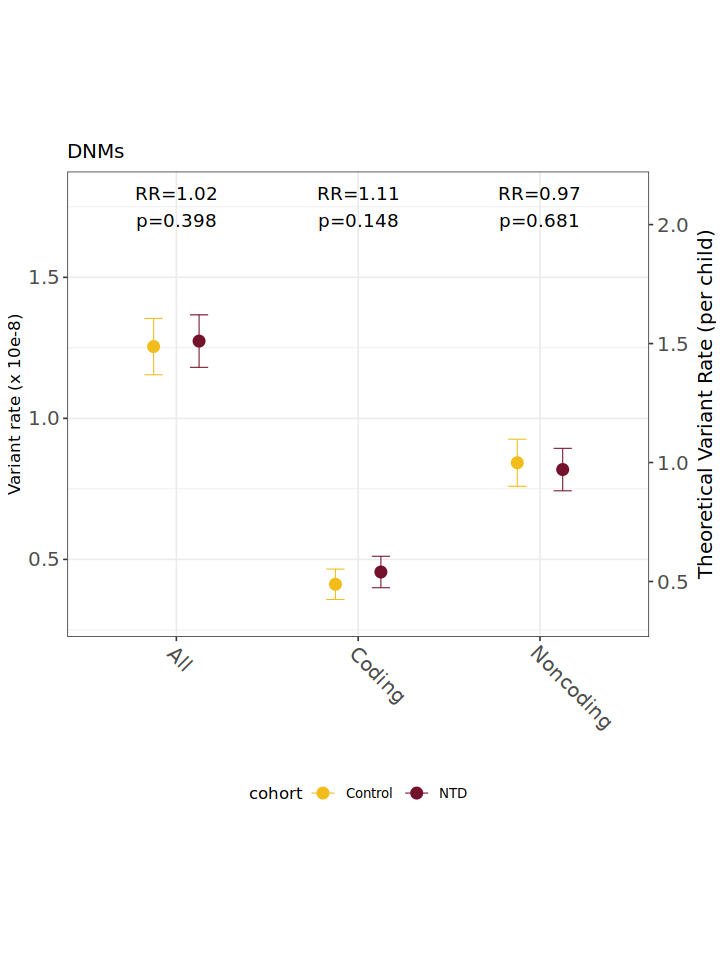

In [30]:
figure_a = c('All','Coding','Noncoding')


df_tmp <- data.frame()
df_rr <- data.frame()

paste("consensus size is ", consensus[1,])
consensus_size = consensus[1,]


for (eff in figure_a) {
    c = c(sum(df.mm[, eff]), sum(df.ss[, eff]))
    T = c(consensus_size*samplecnt.mm, consensus_size*samplecnt.ssc)
    pt = poisson.test(c, T, alternative='greater', conf.level = 0.95)
    show(paste0(eff, ': ', round(pt$p.value, 3), '   ', 'Rate ratio: ', pt$estimate))
    df_rr <- rbind(df_rr, c(eff, round(pt$estimate,3), round(pt$p.value, 3), "MM", "SSC", "All", pt$conf.int))
    df_tmp <- Get_summary(df.melt, eff)
}
head(df_tmp)

df_tmp$class <- factor(df_tmp$category, levels=figure_a)

df_tmp$cohort <- factor(df_tmp$cohort, levels = c('SSC', 'MM'), labels = c("Control", "NTD"))
df_tmp$Gene <- "All genes"
df_tmp_all <- df_tmp
df_tmp$mean <- as.numeric(df_tmp$mean)
df_tmp$lower <- as.numeric(df_tmp$lower)
df_tmp$upper <- as.numeric(df_tmp$upper)
df.melt$variant <- as.numeric(df.melt$variant)

colnames(df_rr) <- c("category", "RR", "pvalue", "MM", "SSC", "Gene")
df_rr

write.table(df_tmp, "/projects/ps-gleesonlab8/User/hiyoothere/NTD/5.Analysis/DNM/Burden/Figure_broad/All_rate.txt", sep='\t', quote=F, row.names=F)

p = ggplot() +
geom_errorbar(data = df_tmp, aes(x = as.factor(category), 
                        ymin = lower, 
                        ymax = upper,group = cohort,color = cohort),
              position = position_dodge(0.5), width = 0.2,size = .3) + 
geom_point(data = df_tmp, aes(category, as.numeric(mean), group = cohort, color = cohort),
        size =3,
          position =position_dodge(0.5)) + 
    scale_y_continuous(limits = c(0.3, 1.8), sec.axis = sec_axis(~ . / (100000000 / 2) * total_size, name = 'Theoretical Variant Rate (per child)')) +
    labs(fill='Cohort', x='', y='Variant rate (x 10e-8)') +
    theme(legend.position='bottom', 
          aspect.ratio = 0.8,
          axis.title.y.right = element_text( angle = 90,size = 12),
         axis.text.x = element_text(angle = -45, hjust = 0.01,size = 12),
          axis.text.y = element_text(size = 12))+ 
scale_color_manual(values =c("#F2BC1B", "#73122C")) +
geom_text(data =subset(df_rr, Gene == 'All'), aes(x = category, y = 1.75,label = paste(paste("RR=",round(as.numeric(RR),2), sep=""), paste("p=",pvalue,sep="" ), sep='\n'))) + 
    ggtitle("DNMs") 
ggsave("/projects/ps-gleesonlab8/User/hiyoothere/NTD/5.Analysis/DNM/Burden/Figure_broad/Coding.pdf", plot= p)

p

In [ ]:
figure_a = c('All', 'SNV', 'INDEL')
df_tmp <- data.frame()
df_rr <- data.frame()




for (eff in figure_a) {
    c = c(sum(df.mm[, eff]), sum(df.ss[, eff]))
    T = c(consensus_size*samplecnt.mm, consensus_size*samplecnt.ssc)
    pt = poisson.test(c, T, alternative='greater', conf.level = 0.95)
    show(paste0(eff, ': ', round(pt$p.value, 3), '   ', 'Rate ratio: ', pt$estimate))
    cnt_mm <- sum(df.mm[,eff])
    cnt_ssc <- sum(df.ss[,eff])
    df_rr <- rbind(df_rr, c(eff, round(pt$estimate,3), round(pt$p.value, 3), "MM", "SSC", "All", pt$conf.int, cnt_mm, cnt_ssc))
    df_tmp <- Get_summary(df.melt, eff)

}
head(df_tmp)
df_tmp$class <- factor(df_tmp$category, levels=figure_a)
df_tmp$mean <- as.numeric(df_tmp$mean)
df_tmp$lower <- as.numeric(df_tmp$lower)
df_tmp$upper <- as.numeric(df_tmp$upper)
df_tmp$cohort <- factor(df_tmp$cohort, levels = c('SSC', 'MM'), labels = c("Control", "NTD"))
df_tmp$Gene <- "All genes"
df_tmp_all <- df_tmp

df.melt$variant <- as.numeric(df.melt$variant)

colnames(df_rr) <- c("category", "RR", "pvalue", "MM", "SSC", "Gene", "Conf", "cnt_mm", "cnt_ssc")
df_rr


df_tmp$category = factor(df_tmp$category, levels = c('All', "SNV", "INDEL"))
p = ggplot() +
geom_errorbar(data = df_tmp, aes(x = as.factor(category), 
                        ymin = lower, 
                        ymax = upper,group = cohort,color = cohort),
              position = position_dodge(0.5), width = 0.2,size = .3) + 
geom_point(data = df_tmp, aes(category, as.numeric(mean), group = cohort, color = cohort),
        size =3,
          position =position_dodge(0.5)) + 
    scale_y_continuous(limits = c(-0.01, 2), sec.axis = sec_axis(~ . / (100000000 / 2) * total_size, name = 'Theoretical Variant Rate (per child)')) +
    labs(fill='Cohort', x='', y='Variant rate (x 10e-8)') +
    theme(aspect.ratio = 0.8,
          legend.position='bottom', 
          axis.title.y.right = element_text( angle = 90,size = 12),
         axis.text.x = element_text(angle = -45, hjust = 0.01,size = 12),
          axis.text.y = element_text(size = 12))+ 
scale_color_manual(values =c("#F2BC1B", "#73122C")) + #=c("#F2BC1B", "#73122C")) +
geom_text(data =subset(df_rr, Gene == 'All'), aes(x = category, y = 1.9,label = paste(paste("RR=",round(as.numeric(RR),2), sep=""), paste("p=",pvalue,sep="" ), sep='\n'))) + 
    ggtitle("DNMs") 

ggsave("/projects/ps-gleesonlab8/User/hiyoothere/NTD/5.Analysis/DNM/Burden/Figure_broad/SNV_INDEL.pdf", plot= p)
p

## Calculate burden in all catergories

In [ ]:

figure_all = c('All', 'Nonsynonymous', 'Missense', 'LGD', 'DMisL','DMis',"DMisL2", "DMisM", "DMisMC","DMisMC2", 'DamagingL','DamagingS',"DamagingL2", "DamagingM", "DamagingMC","DamagingMC2", 'OtherMissense','Synonymous')

typeof(figure_a)
figure_now = figure_a
df_all_stat = data.frame()
print (percent)

In [ ]:



df_tmp <- data.frame()
df_rr <- data.frame()

paste("consensus size is ", consensus[1,])
consensus_size = consensus[1,]

paste("consensus ratio ", consensus[1,]/total_size)

paste("sample ntd ", samplecnt.mm)
paste("sample ssc ", samplecnt.ssc)

for (eff in figure_all) {
    ratio_consen = consensus_size/total_size
    mm = round((total_size*sum(df.mm[, eff])/consensus_size),0)
    ssc = round((total_size*sum(df.ss[, eff])/consensus_size),0)
    show(paste(eff, "raw count", sum(df.mm[, eff]), sum(df.ss[, eff])))
    show(paste(eff, "modi count", mm, ssc))
    c = c(mm,ssc)
    #c=c(sum(df.mm[, eff]), sum(df.ss[, eff]))
    T = c(samplecnt.mm, samplecnt.ssc)
    pt = poisson.test(c, T, alternative='greater', conf.level = 0.95)
    show(paste0(eff, ': ', round(pt$p.value, 8), '   ', 'Rate ratio: ', pt$estimate))
    cnt_mm <- sum(df.mm[,eff])
    cnt_ssc <- sum(df.ss[,eff])
    df_rr <- rbind(df_rr, c(eff, round(pt$estimate,3), round(pt$p.value, 8), "MM", "SSC", "All", pt$conf.int, cnt_mm, cnt_ssc))
    df_tmp <- Get_summary(df.melt, eff)
}
head(df_tmp)
df_tmp$mean <- as.numeric(df_tmp$mean)
df_tmp$lower <- as.numeric(df_tmp$lower)
df_tmp$upper <- as.numeric(df_tmp$upper)
df_tmp$cohort <- factor(df_tmp$cohort, levels = c('SSC', 'MM'), labels = c("SSC", "MM"))
df_tmp$Gene <- "All genes"
df_tmp_all <- df_tmp
df_all_stat = df_tmp_all
df_all_stat_backup = df_all_stat

df.melt$variant <- as.numeric(df.melt$variant)
head(df.melt)
df_tmp
options(repr.plot.width=14, repr.plot.height=8)
df.mm = df[df$cohort == 'MM', ]
df.ss = df[df$cohort == 'SSC', ]
head(df.mm)


dim(df.mm)
dim(df.ss)

dim(df.mm$All)
dim(df.ss$All)
df.melt <- melt(df, id.vars=c('sample', 'family', 'cohort', 'callable'))

print (dim(subset(df.mm,df.mm$All == 0)))
print (dim(subset(df.ss, df.ss$All == 0)))
colnames(df.melt)[5] = 'class'
colnames(df.melt)[6] = 'variant'




head(df.melt)#ggsave("/projects/ps-gleesonlab8/User/hiyoothere/NTD/15.Final/221020_DNM_v9/figure/vplot_all.pdf", plot= p)

In [ ]:
table(df.melt$class)

In [ ]:
dim(data.all)
data.raw <- data.all

NTD_LGD <- subset(data.raw, data.raw$batch.x != "SSC" &  data.raw$IMPACT == "HIGH" )
#D-Mis
NTD_DMis <- subset(data.raw, data.raw$batch.x != "SSC" &  data.raw$MetaSVM_pred== 'D' )
#Damaging
NTD_Dam <- subset(data.raw, data.raw$batch.x != "SSC" & ( data.raw$IMPACT == "HIGH" |  data.raw$MetaSVM_pred== 'D') ) 
#D-Mis-HC
NTD_DamMC <- subset(data.raw, data.raw$batch.x != "SSC" & ( data.raw$IMPACT == "HIGH" |
                                                           data.raw$MetaSVM_pred== 'D' |
                                        (grepl("damaging",data.raw$PolyPhen) &
                                      grepl("deleterious", data.raw$SIFT) &
                                          data.raw$CADD_phred >= 20 )) ) 
#Damaging HC
NTD_DamMC2 <- subset(data.raw, data.raw$batch.x != "SSC" & ( data.raw$IMPACT == "HIGH" |
                                                           data.raw$MetaSVM_pred== 'D' |
                                        (grepl("damaging",data.raw$PolyPhen) &data.raw$CADD_phred >= 20 ) |
                                      (grepl("deleterious", data.raw$SIFT) & data.raw$CADD_phred >= 20 )) ) 



write.table(NTD_Dam,"/projects/ps-gleesonlab8/User/hiyoothere/NTD/5.Analysis/DNM/Burden/NTD_DamS.den_input", sep='\t', quote = F, row.names = F )
write.table(NTD_DamMC2,"/projects/ps-gleesonlab8/User/hiyoothere/NTD/5.Analysis/DNM/Burden/NTD_DamMC2.den_input", sep='\t', quote = F, row.names = F )

SSC_Dam <- subset(data.raw, data.raw$batch.x == "SSC" & (( data.raw$IMPACT == "HIGH" | data.raw$MetaSVM_pred== 'D') )) 


SSC_DamMC2 <- subset(data.raw, data.raw$batch.x == "SSC" & ( data.raw$IMPACT == "HIGH" |
                                                           data.raw$MetaSVM_pred== 'D' |
                                        (grepl("damaging",data.raw$PolyPhen) &data.raw$CADD_phred >= 20 ) |
                                      (grepl("deleterious", data.raw$SIFT) & data.raw$CADD_phred >= 20 )) ) 


write.table(SSC_Dam,"/projects/ps-gleesonlab8/User/hiyoothere/NTD/5.Analysis/DNM/Burden/SSC_DamS.den_input", sep='\t', quote = F, row.names = F )
write.table(SSC_DamMC2,"/projects/ps-gleesonlab8/User/hiyoothere/NTD/5.Analysis/DNM/Burden/SSC_DamMC2.den_input", sep='\t', quote = F, row.names = F )




# Intolerant genes

In [245]:
dim(data.fil)
data.fil.intol = data.fil
data.fil.intol = subset(data.fil.intol, as.numeric(data.fil.intol$pLI.y) >= 0.9)
dim(data.fil.intol)

[1] 1383  142

[1] 348 142

In [246]:
#Make new df for intolerant genes
#With 771 and 723 trios (1492)
df = data.frame(sample = factor(ped.pro$sample)) #, levels=levels(ped.pro$sample)))
dim(df)
#Add familhy
df = merge(df, ped.pro[, c('sample', 'family')], by.x= 'sample',by.y = 'sample', sort = F, all.x = TRUE)
head(df)
#Add Cohort
df$cohort = ifelse(grepl('s', df$sample), 'SSC', 'MM')
head(df)
dim(df)
#Add Callable region
df = merge(df, callable[, c('sample', 'callable')], by= 'sample', sort = F, all.x=TRUE)
df$callable = ifelse(is.na(df$callable), 'NA', df$callable)
dim(df)
head(df)
#Add FA information
#df = merge(df, fa, by= 'family', sort = F, all.x=TRUE)
#df$FA = ifelse(is.na(df$FA), 'NA', df$FA)
#df <- df %>% distinct()
"total probands:"
#dim(df)

samplecnt.mm = as.numeric(table(df$cohort)[1])
samplecnt.mm
samplecnt.ssc = as.numeric(table(df$cohort)[2])
samplecnt.ssc

colnames(data.fil.intol)[30] = "term"

[1] 1496    1

,sample,family
,<fct>,<chr>
1,S12816,101
2,11000.s1,11000
3,11002.s1,11002
4,11003.s1,11003
5,11004.s1,11004
6,11005.s1,11005


,sample,family,cohort
,<fct>,<chr>,<chr>
1,S12816,101,MM
2,11000.s1,11000,SSC
3,11002.s1,11002,SSC
4,11003.s1,11003,SSC
5,11004.s1,11004,SSC
6,11005.s1,11005,SSC


[1] 1496    3

[1] 1496    4

,sample,family,cohort,callable
,<fct>,<chr>,<chr>,<chr>
1,S12816,101,MM,65162766
2,11000.s1,11000,SSC,47881923
3,11002.s1,11002,SSC,55431363
4,11003.s1,11003,SSC,62732391
5,11004.s1,11004,SSC,64331070
6,11005.s1,11005,SSC,53838822


[1] "total probands:"

[1] 772

[1] 724

In [247]:
Inframe

sample,Inframe
<fct>,<int>
12683.s1,1
7035178644,1


In [248]:
data.fil.backup <- data.fil
data.fil <- data.fil.intol

All = as.data.frame(table(data.fil$sample))
Coding = as.data.frame(table(data.fil[data.fil$term %in% coding_term,]$sample))
Noncoding = as.data.frame(table(data.fil[!data.fil$term %in% coding_term,]$sample))
SNV = as.data.frame(table(data.fil[data.fil$VARIANT_CLASS == 'SNV' | data.fil$VARIANT_CLASS == 'substitution',]$sample))
INDEL= as.data.frame(table(data.fil[data.fil$VARIANT_CLASS == 'insertion' | data.fil$VARIANT_CLASS == 'deletion' | data.fil$VARIANT_CLASS == 'indel',]$sample))
#Inframe = as.data.frame(table(data.fil[data.fil$term == 'inframe_deletion' | data.fil$term == 'inframe_insertion',]$sample))
INDEL_Coding = as.data.frame(table(data.fil[(data.fil$VARIANT_CLASS == 'insertion' | data.fil$VARIANT_CLASS == 'deletion' | data.fil$VARIANT_CLASS == 'indel') & (data.fil$term %in% coding_term) ,]$sample))
INDEL_Noncoding = as.data.frame(table(data.fil[(data.fil$VARIANT_CLASS == 'insertion' | data.fil$VARIANT_CLASS == 'deletion' | data.fil$VARIANT_CLASS == 'indel') & (!data.fil$term %in% coding_term) ,]$sample))


LGD = as.data.frame(table(data.fil[data.fil$IMPACT =='HIGH',]$sample))
LGD_FS = as.data.frame(table(data.fil[data.fil$term == 'frameshift_variant',]$sample))
LGD_SP_A = as.data.frame(table(data.fil[data.fil$term == 'splice_acceptor_variant',]$sample))
LGD_SP_D = as.data.frame(table(data.fil[data.fil$term == 'splice_donor_variant',]$sample))
LGD_STOP = as.data.frame(table(data.fil[data.fil$term == 'stop_gain',]$sample))



DMisL2 = as.data.frame(table(data.fil[((grepl("damaging",data.fil$PolyPhen) & data.fil$CADD_phred >=20 ) | data.fil$MetaSVM_pred == 'D' ),]$sample))
DamagingL = as.data.frame(table(data.fil[data.fil$IMPACT =='HIGH' | (data.fil$MetaSVM_pred == 'D') | (grepl("damaging",data.fil$PolyPhen)),]$sample))
DamagingL2 = as.data.frame(table(data.fil[data.fil$IMPACT =='HIGH' | 
                                          (data.fil$MetaSVM_pred == 'D') | ((grepl("damaging",data.fil$PolyPhen)& data.fil$CADD_phred >=20 )),]$sample))

DMisM = as.data.frame(table(data.fil[(grepl("damaging",data.fil$PolyPhen) | 
                                      grepl("deleterious", data.fil$SIFT) |
                                      data.fil$MetaSVM_pred == 'D' ),]$sample))
DamagingM = as.data.frame(table(data.fil[data.fil$IMPACT =='HIGH' |
                                     grepl("damaging",data.fil$PolyPhen) | 
                                      grepl("deleterious", data.fil$SIFT) |
                                      data.fil$MetaSVM_pred == 'D' ,]$sample))
DMisMC = as.data.frame(table(data.fil[((grepl("damaging",data.fil$PolyPhen) & 
                                      grepl("deleterious", data.fil$SIFT) &
                                       data.fil$CADD_phred >= 20) |
                                      data.fil$MetaSVM_pred == 'D' ),]$sample))
DamagingMC = as.data.frame(table(data.fil[data.fil$IMPACT =='HIGH' |
                                     (grepl("damaging",data.fil$PolyPhen) &
                                      grepl("deleterious", data.fil$SIFT) &
                                          data.fil$CADD_phred >= 20 ) |
                                      data.fil$MetaSVM_pred == 'D' ,]$sample))
DMisMC2 = as.data.frame(table(data.fil[((grepl("damaging",data.fil$PolyPhen) & data.fil$CADD_phred >= 20) | 
                                        
                                      (grepl("deleterious", data.fil$SIFT) & data.fil$CADD_phred >= 20) |
                                      data.fil$MetaSVM_pred == 'D' ),]$sample))

DamagingMC2 = as.data.frame(table(data.fil[((grepl("damaging",data.fil$PolyPhen) & data.fil$CADD_phred >= 20) | 
                                        (data.fil$IMPACT =='HIGH') | 
                                      (grepl("deleterious", data.fil$SIFT) & data.fil$CADD_phred >= 20) |
                                      (data.fil$MetaSVM_pred == 'D') ),]$sample))


DMisS = as.data.frame(table(data.fil[data.fil$MetaSVM_pred == 'D',]$sample))
DamagingS = as.data.frame(table(data.fil[data.fil$IMPACT =='HIGH' | (data.fil$MetaSVM_pred == 'D' ),]$sample))
DMisL = as.data.frame(table(data.fil[(grepl("damaging",data.fil$PolyPhen) | data.fil$MetaSVM_pred == 'D' ),]$sample))
DamagingL = as.data.frame(table(data.fil[data.fil$IMPACT =='HIGH' | (data.fil$MetaSVM_pred == 'D') | (grepl("damaging",data.fil$PolyPhen)),]$sample))


Synonymous = as.data.frame(table(data.fil[data.fil$term == 'synonymous_variant',]$sample))
Nonsynonymous = as.data.frame(table(data.fil[data.fil$term != 'synonymous_variant' &data.fil$term %in% coding_term ,]$sample))
Missense = as.data.frame(table(data.fil[data.fil$term == 'missense_variant',]$sample))
OtherMissense = as.data.frame(table(data.fil[(data.fil$term == 'missense_variant') & (data.fil$MetaSVM_pred != 'D'),]$sample))



colnames(All) = c("sample", "All")
colnames(Coding) = c("sample", "Coding")
colnames(Noncoding) = c("sample", "Noncoding")
colnames(SNV) = c("sample", "SNV")
colnames(INDEL) = c("sample", "INDEL")
#colnames(Inframe) = c("sample", "Inframe")
colnames(INDEL_Coding) = c("sample", "INDEL_Coding")
colnames(INDEL_Noncoding) = c("sample", "INDEL_Noncoding")

colnames(LGD) = c("sample", "LGD")
colnames(LGD_FS) = c("sample", "LGD_FS")
colnames(LGD_SP_A) = c("sample", "LGD_SP_A")
colnames(LGD_SP_D) = c("sample", "LGD_SP_D")
colnames(LGD_STOP) = c("sample", "LGD_STOP")

colnames(DMisS) = c("sample", "DMis")
colnames(DamagingS) = c("sample", "DamagingS")
colnames(DMisL) = c("sample", "DMisL")
colnames(DamagingL) = c("sample", "DamagingL")
colnames(DMisM) = c("sample", "DMisM")
colnames(DamagingM) = c("sample", "DamagingM")
colnames(DMisL2) = c("sample", "DMisL2")
colnames(DamagingL2) = c("sample", "DamagingL2")
colnames(DMisMC) = c("sample", "DMisMC")
colnames(DamagingMC) = c("sample", "DamagingMC")
colnames(DMisMC2) = c("sample", "DMisMC2")
colnames(DamagingMC2) = c("sample", "DamagingMC2")
                                          
colnames(Synonymous) = c("sample", "Synonymous")
colnames(Nonsynonymous) = c("sample", "Nonsynonymous")
colnames(Missense) = c("sample", "Missense")
colnames(OtherMissense) = c("sample", "OtherMissense")

df  = left_join(df, All, by = 'sample')
df = left_join(df, Coding, by = 'sample')
df = left_join(df, Noncoding, by = 'sample')
df = left_join(df, SNV, by = 'sample')
df = left_join(df, INDEL, by = 'sample')
#df = left_join(df, Inframe, by = 'sample')
df = left_join(df, INDEL_Coding, by = 'sample')
df = left_join(df, INDEL_Noncoding, by = 'sample')


df = left_join(df, LGD, by = 'sample')
df = left_join(df, LGD_FS, by = 'sample')
df = left_join(df, LGD_SP_A, by = 'sample')
df = left_join(df, LGD_SP_D, by = 'sample')
df = left_join(df, LGD_STOP, by = 'sample')

df = left_join(df, DMisS, by = 'sample')
df = left_join(df, DamagingS, by = 'sample')
df = left_join(df, DMisL, by = 'sample')
df = left_join(df, DamagingL, by = 'sample')
df = left_join(df, DMisM, by = 'sample')
df = left_join(df, DamagingM, by = 'sample')
df = left_join(df, DMisL2, by = 'sample')
df = left_join(df, DamagingL2, by = 'sample')
df = left_join(df, DMisMC, by = 'sample')
df = left_join(df, DamagingMC, by = 'sample')
df = left_join(df, DMisMC2, by = 'sample')
df = left_join(df, DamagingMC2, by = 'sample')

df = left_join(df, Synonymous, by = 'sample')
df = left_join(df, Nonsynonymous, by = 'sample')
df = left_join(df, Missense, by = 'sample')
df = left_join(df, OtherMissense, by = 'sample')
df[is.na(df)] <- 0


head(df)
df.mm = df[df$cohort == 'MM', ]
df.ss = df[df$cohort == 'SSC', ]
head(df.mm)

dim(df.mm)
dim(df.ss)

#Make melted one
df.melt <- melt(df, id.vars=c('sample', 'family', 'cohort', 'callable'))


colnames(df.melt)[5] = 'class'
colnames(df.melt)[6] = 'variant'
head(df.melt)
dim(df)
head(df)
df.mm = df[df$cohort == 'MM', ]
df.ss = df[df$cohort == 'SSC', ]

sum(df.mm$LGD,na.rm = T)
df.mm[is.na(df.mm)] <- 0
df.ss[is.na(df.ss)] <- 0
df.melt[is.na(df.melt)] <- 0

,sample,family,cohort,callable,All,Coding,Noncoding,SNV,INDEL,INDEL_Coding,INDEL_Noncoding,LGD,LGD_FS,LGD_SP_A,LGD_SP_D,LGD_STOP,DMis,DamagingS,DMisL,DamagingL,DMisM,DamagingM,DMisL2,DamagingL2,DMisMC,DamagingMC,DMisMC2,DamagingMC2,Synonymous,Nonsynonymous,Missense,OtherMissense
,<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,S12816,101,MM,65162766,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,11000.s1,11000,SSC,47881923,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,11002.s1,11002,SSC,55431363,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,11003.s1,11003,SSC,62732391,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,11004.s1,11004,SSC,64331070,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,11005.s1,11005,SSC,53838822,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,sample,family,cohort,callable,All,Coding,Noncoding,SNV,INDEL,INDEL_Coding,INDEL_Noncoding,LGD,LGD_FS,LGD_SP_A,LGD_SP_D,LGD_STOP,DMis,DamagingS,DMisL,DamagingL,DMisM,DamagingM,DMisL2,DamagingL2,DMisMC,DamagingMC,DMisMC2,DamagingMC2,Synonymous,Nonsynonymous,Missense,OtherMissense
,<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,S12816,101,MM,65162766,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
498,S13324,125,MM,77840952,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1
688,S16116,134,MM,88045008,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1
728,S12819,138,MM,71003984,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
729,S12168,191,MM,81651983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
730,S10546,20,MM,81251130,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


[1] 772  32

[1] 724  32

,sample,family,cohort,callable,class,variant
,<fct>,<chr>,<chr>,<chr>,<fct>,<dbl>
1,S12816,101,MM,65162766,All,0
2,11000.s1,11000,SSC,47881923,All,0
3,11002.s1,11002,SSC,55431363,All,0
4,11003.s1,11003,SSC,62732391,All,1
5,11004.s1,11004,SSC,64331070,All,0
6,11005.s1,11005,SSC,53838822,All,0


[1] 1496   32

,sample,family,cohort,callable,All,Coding,Noncoding,SNV,INDEL,INDEL_Coding,INDEL_Noncoding,LGD,LGD_FS,LGD_SP_A,LGD_SP_D,LGD_STOP,DMis,DamagingS,DMisL,DamagingL,DMisM,DamagingM,DMisL2,DamagingL2,DMisMC,DamagingMC,DMisMC2,DamagingMC2,Synonymous,Nonsynonymous,Missense,OtherMissense
,<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,S12816,101,MM,65162766,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,11000.s1,11000,SSC,47881923,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,11002.s1,11002,SSC,55431363,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,11003.s1,11003,SSC,62732391,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,11004.s1,11004,SSC,64331070,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,11005.s1,11005,SSC,53838822,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


[1] 18

In [249]:
df$MM = ifelse(df$cohort == 'MM', 1, 0)

tol_type = "intolerant genes"
df_odds_intol = data.frame()

for (eff in figure_all) {
    state <- paste("MM ~ ", eff)
    x <- glm(as.formula(state),
             family = binomial,
             data = df)
    suppressMessages(a<- confint(x))

    coef <- exp(coef(x))
    print (coef)[2]
    result =  c(eff, coef[2], exp(a)[2,1], exp(a)[2,2], summary(x)$coefficient[2,4], tol_type) 
    #print (result)
    df_odds_intol = rbind(df_odds_intol, result)
}

#df_odds
colnames(df_odds_intol) <- c("Type","OR", "lower", "upper", "p", "tol")

df_odds = rbind(df_odds, df_odds_intol)

table.write(df_odds, "")

(Intercept)         All 
   1.023969    1.191348 
  (Intercept) Nonsynonymous 
     1.027299      1.981618 
(Intercept)    Missense 
    1.03709     1.88655 
(Intercept)         LGD 
   1.055991    1.755413 
(Intercept)       DMisL 
   1.044881    2.349115 
(Intercept)        DMis 
   1.055325    8.528178 
(Intercept)      DMisL2 
   1.044881    2.349115 
(Intercept)       DMisM 
   1.045007    2.134693 
(Intercept)      DMisMC 
   1.041899    3.119303 
(Intercept)   DamagingL 
   1.034466    2.092356 
(Intercept)   DamagingS 
   1.045398    2.391978 
(Intercept)  DamagingL2 
   1.034466    2.092356 
(Intercept)   DamagingM 
   1.033088    2.087804 
(Intercept)  DamagingMC 
   1.031701    2.395067 
  (Intercept) OtherMissense 
     1.048433      1.560770 
(Intercept)  Synonymous 
   1.064195    1.064966 


ERROR: Error in table.write(df_odds, ""): could not find function "table.write"


In [250]:

print (sum(df.mm$All))
print (sum(df.ss$All))

print (sum(df.mm$Coding))
print (sum(df.ss$Coding))

print (sum(df.mm$Noncoding))
print (sum(df.ss$Noncoding))

print (sum(df.mm$Synonymous))
print (sum(df.ss$Synonymous))
sum(df$Synonymous)

print (sum(df.mm$DMisM))
print (sum(df.ss$DMisM))

print (sum(df.mm$DMisMC))
print (sum(df.ss$DMisMC))

coding_term

[1] 195
[1] 153
[1] 82
[1] 50
[1] 113
[1] 103
[1] 25
[1] 22


[1] 47

[1] 29
[1] 13
[1] 26
[1] 8


[1] "frameshift_variant"       "inframe_deletion"        
 [3] "inframe_insertion"        "synonymous_variant"      
 [5] "missense_variant"         "splice_acceptor_variant" 
 [7] "splice_donor_variant"     "start_lost"              
 [9] "stop_gained"              "stop_lost"               
[11] "stop_retained_variant"    "protein_altering_variant"

In [251]:

#df_tmp$cohort <- factor(df_tmp$cohort, levels = c('SSC', 'MM'), labels = c("Control", "NTD"))
df_tmp = data.frame()
for (eff in figure_all) {
    ratio_consen = consensus_size/total_size
    mm = round((total_size/consensus_size)*sum(df.mm[, eff]),0)
    ssc = round((total_size/consensus_size)*sum(df.ss[, eff]),0)
    c = c(mm, ssc)
    #c = c(sum(df.mm[, eff]),sum(df.ss[, eff]))
    T = c(samplecnt.mm, samplecnt.ssc)
    pt = poisson.test(c, T, alternative='greater', conf.level = 0.95)
    show(paste0(eff, ': ', round(pt$p.value, 3), '   ', 'Rate ratio: ', pt$estimate))
    df_tmp <- Get_summary(df.melt, eff)
    cnt_mm <- sum(df.mm[,eff])
    cnt_ssc <- sum(df.ss[,eff])
    df_rr <- rbind(df_rr, c(eff, round(pt$estimate,3), round(pt$p.value, 3), "MM", "SSC", "Constrained", pt$conf.int, cnt_mm, cnt_ssc))
}



df_tmp$mean <- as.numeric(df_tmp$mean)
df_tmp$lower <- as.numeric(df_tmp$lower)
df_tmp$upper <- as.numeric(df_tmp$upper)
df_tmp$Gene <- "Constrained genes"
df_tmp_con <- df_tmp
#df_tmp$cohort <- factor(df_tmp$cohort, levels = c('SSC', 'MM'), labels = c("Control", "NTD"))



df.melt$variant <- as.numeric(df.melt$variant)
df_tmp




[1] "All: 0.02   Rate ratio: 1.19496907905733"

	Wilcoxon rank sum test with continuity correction

data:  l_rate_mm and l_rate_ssc
W = 289484, p-value = 0.08683
alternative hypothesis: true location shift is not equal to 0

[1] "Nonsynonymous: 0   Rate ratio: 1.91732872769142"

	Wilcoxon rank sum test with continuity correction

data:  l_rate_mm and l_rate_ssc
W = 289290, p-value = 0.003339
alternative hypothesis: true location shift is not equal to 0

[1] "Missense: 0.001   Rate ratio: 1.85030107828035"

	Wilcoxon rank sum test with continuity correction

data:  l_rate_mm and l_rate_ssc
W = 286876, p-value = 0.01389
alternative hypothesis: true location shift is not equal to 0

[1] "LGD: 0.039   Rate ratio: 1.81312607944732"

	Wilcoxon rank sum test with continuity correction

data:  l_rate_mm and l_rate_ssc
W = 282526, p-value = 0.09873
alternative hypothesis: true location shift is not equal to 0

[1] "DMisL: 0.002   Rate ratio: 2.29245826137018"

	Wilcoxon rank sum test with conti

cohort,category,mean,lower,upper,mean_diff,mean_diff_lower,mean_diff_upper,Gene
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
MM,All,0.34550887,0.297063590,0.39395415,NA,NA,NA,Constrained genes
SSC,All,0.28906450,0.242016333,0.33611266,NA,NA,NA,Constrained genes
MM,Nonsynonymous,0.10099490,0.075706682,0.12628312,0.0480942084857547,0.0163324233344647,0.0798559936370446,Constrained genes
SSC,Nonsynonymous,0.05290069,0.033643475,0.07215791,0.0480942084857547,0.0163324233344647,0.0798559936370446,Constrained genes
MM,Missense,0.07973282,0.057075877,0.10238976,0.0362786762972129,0.00766228506990043,0.0648950675245253,Constrained genes
SSC,Missense,0.04345414,0.025938225,0.06097006,0.0362786762972129,0.00766228506990043,0.0648950675245253,Constrained genes
MM,LGD,0.03189313,0.016492222,0.04729403,NA,NA,NA,Constrained genes
SSC,LGD,0.01700379,0.004756062,0.02925153,NA,NA,NA,Constrained genes
MM,DMisL,0.04783969,0.030073765,0.06560561,0.0270572750365613,0.00551159951987933,0.0486029505532434,Constrained genes


In [252]:
#df_tmp_all
#df_tmp_con
df_all_stat <- df_tmp_all
df_all_stat <- rbind(df_all_stat, df_tmp_con)
df_all_stat
df_rr
colnames(df_rr) <- c("category","RR", "pvalue", 'MM', "SSC", "Gene","Lower","Upper", "MM", "SSC")
df_rr_backup <- df_rr
df_odds
write.table(df_rr, "/projects/ps-gleesonlab8/User/hiyoothere/NTD/5.Analysis/DNM/Burden/ForPlot/RR_total_v2.txt", quote = F, row.names = F, sep = '\t')
write.table(df_all_stat, "/projects/ps-gleesonlab8/User/hiyoothere/NTD/5.Analysis/DNM/Burden/ForPlot/Stat_v2.txt", quote = F, row.names = F, sep = '\t')
write.table(df_odds, "/projects/ps-gleesonlab8/User/hiyoothere/NTD/5.Analysis/DNM/Burden/ForPlot/OR_total_v2.txt", quote = F, row.names = F, sep = '\t')

ERROR: Error in rbind(deparse.level, ...): numbers of columns of arguments do not match


## Burden with FA information

In [ ]:
dim(df.mm)

In [ ]:
#df.mm <- df.mm.backup
dim(df.mm.backup)

In [ ]:
head(df.mm)
dim(df.mm)
table(df.mm$FA)

df.mm.fa = subset(df.mm, df.mm$FA == 'YES')
df.mm.nfa = subset(df.mm, df.mm$FA == 'NO')

samplecnt.mm = 319

as.numeric(dim(df.mm.fa$cohort)[1])
dim(df.mm.fa)
dim(df.mm.nfa)

df.mm.backup <- df.mm

In [ ]:
df.mm <- df.mm.fa

total_size = 59281518 #size of coding region (hg38)

consensus = read.delim(paste("/projects/ps-gleesonlab8/User/hiyoothere/NTD/10.Poisson/consensus_region/all_batches_",percent, '.txt', sep=""), header = FALSE)#all_batches_70.bed
consensus
Get_summary <- function(input, category){
    
    tmp_data = subset(df.melt, class == category)
    head(tmp_data)
    tmp_mm = tmp_data[tmp_data$cohort == 'MM', ]
    tmp_ssc = tmp_data[tmp_data$cohort == 'SSC', ]
#mean(tmp_mm$variant)
   
    df_tmp <- rbind(df_tmp,c('MM', category,  mean(as.numeric(tmp_mm$variant) * 100000000 / consensus_size / 2), 
                             sd(as.numeric(tmp_mm$variant) * 100000000 / consensus_size / 2), 
                             SE(as.numeric(tmp_mm$variant) * 100000000 / consensus_size / 2), 
                             CI(as.numeric(tmp_mm$variant) * 100000000 / consensus_size / 2)))
    df_tmp <- rbind(df_tmp, c('SSC',category, mean(as.numeric(tmp_ssc$variant) * 100000000 / consensus_size / 2), 
                              sd(as.numeric(tmp_ssc$variant) * 100000000 / consensus_size / 2),
                              SE(as.numeric(tmp_ssc$variant) * 100000000 / consensus_size / 2), 
                              CI(as.numeric(tmp_ssc$variant) * 100000000 / consensus_size / 2)))
    colnames(df_tmp) = c('cohort', 'category','mean', 'sd', 'se', 'ci')
    return (df_tmp)
}

df_tmp <- data.frame()
df_rr <- data.frame()

paste("consensus size is ", consensus[1,])
consensus_size = consensus[1,]

paste("consensus ratio ", consensus[1,]/total_size)

paste("sample ntd ", samplecnt.mm)
paste("sample ssc ", samplecnt.ssc)

for (eff in figure_all) {
    ratio_consen = consensus_size/total_size
    mm = round((total_size*sum(df.mm[, eff])/consensus_size),0)
    ssc = round((total_size*sum(df.ss[, eff])/consensus_size),0)
    show(paste(eff, "raw count", sum(df.mm[, eff]), sum(df.ss[, eff])))
    show(paste(eff, "modi count", mm, ssc))
    c = c(mm,ssc)
    #c=c(sum(df.mm[, eff]), sum(df.ss[, eff]))
    T = c(samplecnt.mm, samplecnt.ssc)
    pt = poisson.test(c, T, alternative='two.sided', conf.level = 0.95)
    show(paste0(eff, ': ', round(pt$p.value, 8), '   ', 'Rate ratio: ', pt$estimate))
    cnt_mm <- sum(df.mm[,eff])
    cnt_ssc <- sum(df.ss[,eff])
    df_rr <- rbind(df_rr, c(eff, round(pt$estimate,3), round(pt$p.value, 8), "MM", "SSC", "All", pt$conf.int, cnt_mm, cnt_ssc))
    df_tmp <- Get_summary(df.melt, eff)
}
head(df_tmp)
df_tmp$mean <- as.numeric(df_tmp$mean)
df_tmp$ci <- as.numeric(df_tmp$ci)
df_tmp$cohort <- factor(df_tmp$cohort, levels = c('SSC', 'MM'), labels = c("SSC", "MM"))
df_tmp$Gene <- "All genes"
df_tmp_all <- df_tmp
df_all_stat = df_tmp_all
df_all_stat_backup = df_all_stat

df.melt$variant <- as.numeric(df.melt$variant)
head(df.melt)
df_tmp
options(repr.plot.width=14, repr.plot.height=8)
df.mm = df[df$cohort == 'MM', ]
df.ss = df[df$cohort == 'SSC', ]
head(df.mm)


dim(df.mm)
dim(df.ss)

dim(df.mm$All)
dim(df.ss$All)
df.melt <- melt(df, id.vars=c('sample', 'family', 'cohort', 'callable'))

print (dim(subset(df.mm,df.mm$All == 0)))
print (dim(subset(df.ss, df.ss$All == 0)))
colnames(df.melt)[5] = 'class'
colnames(df.melt)[6] = 'variant'




head(df.melt)#ggsave("/projects/ps-gleesonlab8/User/hiyoothere/NTD/15.Final/221020_DNM_v9/figure/vplot_all.pdf", plot= p)

In [191]:
(total_size/consensus_size)*sum(df.mm[, eff])
round((total_size/consensus_size)*sum(df.mm[, eff]),0)


[1] 40.54443

[1] 41

In [192]:

df_tmp
colnames(df_rr) <- c("category","RR", "pvalue", 'MM', "SSC", "Gene","Lower","Upper", "MM", "SSC")
df_rr
df_all_stat

cohort,category,mean,lower,upper,mean_diff,mean_diff_lower,mean_diff_upper,Gene
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
MM,All,1.27395323,1.18086405,1.36704240,NA,NA,NA,All genes
SSC,All,1.25450214,1.15469614,1.35430813,NA,NA,NA,All genes
MM,Nonsynonymous,0.33133415,0.28467739,0.37799091,NA,NA,NA,All genes
SSC,Nonsynonymous,0.28906450,0.24442039,0.33370860,NA,NA,NA,All genes
MM,Missense,0.27463526,0.23174229,0.31752822,NA,NA,NA,All genes
SSC,Missense,0.26072484,0.21812915,0.30332054,NA,NA,NA,All genes
MM,LGD,0.11516962,0.08656898,0.14377027,0.0603796209933105,0.0249566763471755,0.0958025656394456,All genes
SSC,LGD,0.05479000,0.03384624,0.07573377,0.0603796209933105,0.0249566763471755,0.0958025656394456,All genes
MM,DMisL,0.15415011,0.12278819,0.18551203,NA,NA,NA,All genes


category,RR,pvalue,MM,SSC,Gene,Lower,Upper,MM,SSC
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
All,1.015,0.36750219,MM,SSC,All,0.946314210007404,Inf,719,664
Nonsynonymous,1.146,0.06068071,MM,SSC,All,0.991864762164627,Inf,187,153
Missense,1.051,0.3108332,MM,SSC,All,0.899748854658688,Inf,155,138
LGD,2.095,9.07e-06,MM,SSC,All,1.55232208946951,Inf,65,29
DMisL,1.102,0.23590122,MM,SSC,All,0.89180362641801,Inf,87,74
DMis,1.517,0.03400915,MM,SSC,All,1.03904139279005,Inf,34,21
DMisL2,1.143,0.15889109,MM,SSC,All,0.922002711183897,Inf,86,70
DMisM,1.086,0.25142529,MM,SSC,All,0.895992573688703,Inf,104,90
DMisMC,1.192,0.1111023,MM,SSC,All,0.944142160308373,Inf,75,59


cohort,category,mean,lower,upper,mean_diff,mean_diff_lower,mean_diff_upper,Gene
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
MM,All,1.27395323,1.18086405,1.36704240,NA,NA,NA,All genes
SSC,All,1.25450214,1.15469614,1.35430813,NA,NA,NA,All genes
MM,Nonsynonymous,0.33133415,0.28467739,0.37799091,NA,NA,NA,All genes
SSC,Nonsynonymous,0.28906450,0.24442039,0.33370860,NA,NA,NA,All genes
MM,Missense,0.27463526,0.23174229,0.31752822,NA,NA,NA,All genes
SSC,Missense,0.26072484,0.21812915,0.30332054,NA,NA,NA,All genes
MM,LGD,0.11516962,0.08656898,0.14377027,0.0603796209933105,0.0249566763471755,0.0958025656394456,All genes
SSC,LGD,0.05479000,0.03384624,0.07573377,0.0603796209933105,0.0249566763471755,0.0958025656394456,All genes
MM,DMisL,0.15415011,0.12278819,0.18551203,NA,NA,NA,All genes


In [193]:
figure_a = c('LGD','DMis','DamagingS','OtherMissense', 'Synonymous')
label_a = c('LGD','DMis','LGD + DMis','Other missense', 'Synonymous')

df_all_stat$category <- factor(df_all_stat$category, levels = figure_a)
df_all_stat$cohort <- factor(df_all_stat$cohort, levels = c("SSC", "MM"))

p_fa <- ggplot(df_all_stat, aes(category, as.numeric(mean))) +
  geom_errorbar(aes(x = category, ymin=mean-ci, ymax = mean+ci,group = cohort,color = category),
                position = position_dodge(0.5), width = 0.2,size = .3) + 
  geom_point(data = df_all_stat,
             aes(category, as.numeric(mean), group = cohort, color = category, shape = cohort),
             size =2.5,
             position =position_dodge(0.5)) + 
  scale_color_manual(values = c("#642E44", "#A65D7C",  "#E5A3B1", "#D94929", "#A62F14", "#C2C0A6", "#889C9B", "#B2BEBF")) +
  scale_x_discrete(breaks=figure_a,labels=label_a) + 
  scale_y_continuous(sec.axis = sec_axis(~ . / (100000000 / 2) * total_size, name = 'Theoretical Variant Rate (per child)'), limits= c(0,0.5)) +
  labs(fill='Cohort', x='', y='Variant rate (x 10e-8)') +
  theme_classic() +
  theme(legend.position='bottom', 
        aspect.ratio = 0.6,
        axis.title.y.right = element_text( angle = 90,size = 12),
        axis.text.x = element_text(angle = -45, hjust = 0.01,size = 10, color = "black", face = "bold"),
        axis.text.y = element_text(size = 12))+ 
  #geom_text(data =df_rr, aes(x = category, y = 0.13,
     #label = paste(paste("RR=",round(as.numeric(RR),2), sep=""), 
     #paste("p=",ifelse(pvalue>0.01, round(pvalue,2), formatC(pvalue, format = "e", digits = 1)),sep="" ), sep='\n')), size = 3) + 
  #geom_text(data =df_rr, 
            #aes(x = category, y =0.1, label = ifelse(pvalue > 0.05, "NS", ifelse(pvalue>0.01, "*", ifelse(pvalue > 0.001, "**", ifelse(pvalue<= 0.001, "***",""))))), size =3) + 
  ggtitle("With FA")

p_fa

ERROR while rich displaying an object: Error in `geom_errorbar()`:
! Problem while computing aesthetics.
i Error occurred in the 1st layer.
Caused by error in `FUN()`:
! object 'ci' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = err

## Burden with FA information - wo FA

In [194]:
df.mm <- df.mm.backup

head(df.mm)
dim(df.mm)
table(df.mm$FA)

df.mm.nfa = subset(df.mm, df.mm$FA == 'NO')
samplecnt.mm = 438

dim(df.mm.nfa)



ERROR: Error in eval(expr, envir, enclos): object 'df.mm.backup' not found


In [195]:
df.mm <- df.mm.nfa

total_size = 59281518 #size of coding region (hg38)

consensus = read.delim(paste("/projects/ps-gleesonlab8/User/hiyoothere/NTD/10.Poisson/consensus_region/all_batches_",percent, '.txt', sep=""), header = FALSE)#all_batches_70.bed
consensus
Get_summary <- function(input, category){
    
    tmp_data = subset(df.melt, class == category)
    head(tmp_data)
    tmp_mm = tmp_data[tmp_data$cohort == 'MM', ]
    tmp_ssc = tmp_data[tmp_data$cohort == 'SSC', ]
#mean(tmp_mm$variant)
   
    df_tmp <- rbind(df_tmp,c('MM', category,  mean(as.numeric(tmp_mm$variant) * 100000000 / consensus_size / 2), 
                             sd(as.numeric(tmp_mm$variant) * 100000000 / consensus_size / 2), 
                             SE(as.numeric(tmp_mm$variant) * 100000000 / consensus_size / 2), 
                             CI(as.numeric(tmp_mm$variant) * 100000000 / consensus_size / 2)))
    df_tmp <- rbind(df_tmp, c('SSC',category, mean(as.numeric(tmp_ssc$variant) * 100000000 / consensus_size / 2), 
                              sd(as.numeric(tmp_ssc$variant) * 100000000 / consensus_size / 2),
                              SE(as.numeric(tmp_ssc$variant) * 100000000 / consensus_size / 2), 
                              CI(as.numeric(tmp_ssc$variant) * 100000000 / consensus_size / 2)))
    colnames(df_tmp) = c('cohort', 'category','mean', 'sd', 'se', 'ci')
    return (df_tmp)
}

df_tmp <- data.frame()
df_rr <- data.frame()

paste("consensus size is ", consensus[1,])
consensus_size = consensus[1,]

paste("consensus ratio ", consensus[1,]/total_size)

paste("sample ntd ", samplecnt.mm)
paste("sample ssc ", samplecnt.ssc)

for (eff in figure_all) {
    ratio_consen = consensus_size/total_size
    mm = round((total_size*sum(df.mm[, eff])/consensus_size),0)
    ssc = round((total_size*sum(df.ss[, eff])/consensus_size),0)
    show(paste(eff, "raw count", sum(df.mm[, eff]), sum(df.ss[, eff])))
    show(paste(eff, "modi count", mm, ssc))
    c = c(mm,ssc)
    #c=c(sum(df.mm[, eff]), sum(df.ss[, eff]))
    T = c(samplecnt.mm, samplecnt.ssc)
    pt = poisson.test(c, T, alternative='two.sided', conf.level = 0.95)
    show(paste0(eff, ': ', round(pt$p.value, 8), '   ', 'Rate ratio: ', pt$estimate))
    cnt_mm <- sum(df.mm[,eff])
    cnt_ssc <- sum(df.ss[,eff])
    df_rr <- rbind(df_rr, c(eff, round(pt$estimate,3), round(pt$p.value, 8), "MM", "SSC", "All", pt$conf.int, cnt_mm, cnt_ssc))
    df_tmp <- Get_summary(df.melt, eff)
}
head(df_tmp)
df_tmp$mean <- as.numeric(df_tmp$mean)
df_tmp$ci <- as.numeric(df_tmp$ci)
df_tmp$cohort <- factor(df_tmp$cohort, levels = c('SSC', 'MM'), labels = c("SSC", "MM"))
df_tmp$Gene <- "All genes"
df_tmp_all <- df_tmp
df_all_stat = df_tmp_all
df_all_stat_backup = df_all_stat

df.melt$variant <- as.numeric(df.melt$variant)
head(df.melt)
df_tmp
options(repr.plot.width=14, repr.plot.height=8)
df.mm = df[df$cohort == 'MM', ]
df.ss = df[df$cohort == 'SSC', ]
head(df.mm)


dim(df.mm)
dim(df.ss)

dim(df.mm$All)
dim(df.ss$All)
df.melt <- melt(df, id.vars=c('sample', 'family', 'cohort', 'callable'))

print (dim(subset(df.mm,df.mm$All == 0)))
print (dim(subset(df.ss, df.ss$All == 0)))
colnames(df.melt)[5] = 'class'
colnames(df.melt)[6] = 'variant'




head(df.melt)#ggsave("/projects/ps-gleesonlab8/User/hiyoothere/NTD/15.Final/221020_DNM_v9/figure/vplot_all.pdf", plot= p)

ERROR: Error in eval(expr, envir, enclos): object 'df.mm.nfa' not found


In [196]:
(total_size/consensus_size)*sum(df.mm[, eff])
round((total_size/consensus_size)*sum(df.mm[, eff]),0)


[1] 40.54443

[1] 41

In [197]:

df_tmp
colnames(df_rr) <- c("category","RR", "pvalue", 'MM', "SSC", "Gene","Lower","Upper", "MM", "SSC")
df_rr
df_all_stat

cohort,category,mean,lower,upper,mean_diff,mean_diff_lower,mean_diff_upper,Gene
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
MM,All,1.27395323,1.18086405,1.36704240,NA,NA,NA,All genes
SSC,All,1.25450214,1.15469614,1.35430813,NA,NA,NA,All genes
MM,Nonsynonymous,0.33133415,0.28467739,0.37799091,NA,NA,NA,All genes
SSC,Nonsynonymous,0.28906450,0.24442039,0.33370860,NA,NA,NA,All genes
MM,Missense,0.27463526,0.23174229,0.31752822,NA,NA,NA,All genes
SSC,Missense,0.26072484,0.21812915,0.30332054,NA,NA,NA,All genes
MM,LGD,0.11516962,0.08656898,0.14377027,0.0603796209933105,0.0249566763471755,0.0958025656394456,All genes
SSC,LGD,0.05479000,0.03384624,0.07573377,0.0603796209933105,0.0249566763471755,0.0958025656394456,All genes
MM,DMisL,0.15415011,0.12278819,0.18551203,NA,NA,NA,All genes


category,RR,pvalue,MM,SSC,Gene,Lower,Upper,MM,SSC
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
All,1.015,0.36750219,MM,SSC,All,0.946314210007404,Inf,719,664
Nonsynonymous,1.146,0.06068071,MM,SSC,All,0.991864762164627,Inf,187,153
Missense,1.051,0.3108332,MM,SSC,All,0.899748854658688,Inf,155,138
LGD,2.095,9.07e-06,MM,SSC,All,1.55232208946951,Inf,65,29
DMisL,1.102,0.23590122,MM,SSC,All,0.89180362641801,Inf,87,74
DMis,1.517,0.03400915,MM,SSC,All,1.03904139279005,Inf,34,21
DMisL2,1.143,0.15889109,MM,SSC,All,0.922002711183897,Inf,86,70
DMisM,1.086,0.25142529,MM,SSC,All,0.895992573688703,Inf,104,90
DMisMC,1.192,0.1111023,MM,SSC,All,0.944142160308373,Inf,75,59


cohort,category,mean,lower,upper,mean_diff,mean_diff_lower,mean_diff_upper,Gene
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
MM,NA,1.27395323,1.18086405,1.36704240,NA,NA,NA,All genes
SSC,NA,1.25450214,1.15469614,1.35430813,NA,NA,NA,All genes
MM,NA,0.33133415,0.28467739,0.37799091,NA,NA,NA,All genes
SSC,NA,0.28906450,0.24442039,0.33370860,NA,NA,NA,All genes
MM,NA,0.27463526,0.23174229,0.31752822,NA,NA,NA,All genes
SSC,NA,0.26072484,0.21812915,0.30332054,NA,NA,NA,All genes
MM,LGD,0.11516962,0.08656898,0.14377027,0.0603796209933105,0.0249566763471755,0.0958025656394456,All genes
SSC,LGD,0.05479000,0.03384624,0.07573377,0.0603796209933105,0.0249566763471755,0.0958025656394456,All genes
MM,NA,0.15415011,0.12278819,0.18551203,NA,NA,NA,All genes


In [198]:
figure_a = c('LGD','DMis','DamagingS','OtherMissense', 'Synonymous')
label_a = c('LGD','DMis','LGD + DMis','Other missense', 'Synonymous')

df_all_stat$category <- factor(df_all_stat$category, levels = figure_a)
df_all_stat$cohort <- factor(df_all_stat$cohort, levels = c("SSC", "MM"))

p_fa <- ggplot(df_all_stat, aes(category, as.numeric(mean))) +
  geom_errorbar(aes(x = category, ymin=mean-ci, ymax = mean+ci,group = cohort,color = category),
                position = position_dodge(0.5), width = 0.2,size = .3) + 
  geom_point(data = df_all_stat,
             aes(category, as.numeric(mean), group = cohort, color = category, shape = cohort),
             size =2.5,
             position =position_dodge(0.5)) + 
  scale_color_manual(values = c("#642E44", "#A65D7C",  "#E5A3B1", "#D94929", "#A62F14", "#C2C0A6", "#889C9B", "#B2BEBF")) +
  scale_x_discrete(breaks=figure_a,labels=label_a) + 
  scale_y_continuous(sec.axis = sec_axis(~ . / (100000000 / 2) * total_size, name = 'Theoretical Variant Rate (per child)'), limits= c(0,0.5)) +
  labs(fill='Cohort', x='', y='Variant rate (x 10e-8)') +
  theme_classic() +
  theme(legend.position='bottom', 
        aspect.ratio = 0.6,
        axis.title.y.right = element_text( angle = 90,size = 12),
        axis.text.x = element_text(angle = -45, hjust = 0.01,size = 10, color = "black", face = "bold"),
        axis.text.y = element_text(size = 12))+ 
  #geom_text(data =df_rr, aes(x = category, y = 0.13,
     #label = paste(paste("RR=",round(as.numeric(RR),2), sep=""), 
     #paste("p=",ifelse(pvalue>0.01, round(pvalue,2), formatC(pvalue, format = "e", digits = 1)),sep="" ), sep='\n')), size = 3) + 
  #geom_text(data =df_rr, 
            #aes(x = category, y =0.1, label = ifelse(pvalue > 0.05, "NS", ifelse(pvalue>0.01, "*", ifelse(pvalue > 0.001, "**", ifelse(pvalue<= 0.001, "***",""))))), size =3) + 
  ggtitle("Without FA")

p_fa

ERROR while rich displaying an object: Error in `geom_errorbar()`:
! Problem while computing aesthetics.
i Error occurred in the 1st layer.
Caused by error in `FUN()`:
! object 'ci' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = err

In [199]:
tol_type = "Intol genes"


for (eff in figure_a) {
    state <- paste("MM ~ ", eff)
    x <- glm(as.formula(state),
             family = binomial,
             data = df)
    suppressMessages(a<- confint(x))

    coef <- exp(coef(x))
    print (coef)[2]
    result =  c(eff, coef[2], exp(a)[2,1], exp(a)[2,2], summary(x)$coefficient[2,4], tol_type) 
    #print (result)
    df_odds = rbind(df_odds, result)
}
df_odds

(Intercept)         LGD 
   1.055991    1.755413 
(Intercept)        DMis 
   1.055325    8.528178 
(Intercept)   DamagingS 
   1.045398    2.391978 
  (Intercept) OtherMissense 
     1.048433      1.560770 
(Intercept)  Synonymous 
   1.064195    1.064966 


Type,OR,lower,upper,p,tol
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
All,1.0149041131636,0.915180233716343,1.12577821990192,0.779252715938502,all genes
Nonsynonymous,1.15367936765932,0.927595114899581,1.43754877838492,0.200299283879461,all genes
Missense,1.05516810386382,0.835910625711855,1.3334607718297,0.651712533618056,all genes
LGD,2.02642265159431,1.33320143793986,3.16951204591218,0.0013235577008087,all genes
DMisL,1.10921567949408,0.806533181698217,1.52958442415603,0.524662389922903,all genes
DMis,1.5194766245253,0.888836306573464,2.66301388081266,0.132458158206779,all genes
DMisL2,1.16136312213606,0.840653844766046,1.61018939480137,0.36588472654298,all genes
DMisM,1.08803553532893,0.815271648864723,1.45506965894187,0.567311918766137,all genes
DMisMC,1.20203967312936,0.849189828418962,1.70981395748909,0.301464634680291,all genes


In [200]:


df_rr

category,RR,pvalue,MM,SSC,Gene,Lower,Upper,MM,SSC
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
All,1.015,0.36750219,MM,SSC,All,0.946314210007404,Inf,719,664
Nonsynonymous,1.146,0.06068071,MM,SSC,All,0.991864762164627,Inf,187,153
Missense,1.051,0.3108332,MM,SSC,All,0.899748854658688,Inf,155,138
LGD,2.095,9.07e-06,MM,SSC,All,1.55232208946951,Inf,65,29
DMisL,1.102,0.23590122,MM,SSC,All,0.89180362641801,Inf,87,74
DMis,1.517,0.03400915,MM,SSC,All,1.03904139279005,Inf,34,21
DMisL2,1.143,0.15889109,MM,SSC,All,0.922002711183897,Inf,86,70
DMisM,1.086,0.25142529,MM,SSC,All,0.895992573688703,Inf,104,90
DMisMC,1.192,0.1111023,MM,SSC,All,0.944142160308373,Inf,75,59


In [201]:
figure_a = c('LGD','DMisS','DMisN','DamagingS', 'DamagingN','OtherMissense', 'Synonymous')

## Main Fig1

In [ ]:
df_all_stat_backup <- df_all_stat


figure_a = c('LGD','LGD_FS', 'LGD_STOP','DMisS','DamagingS','OtherMissense', 'Synonymous')

df_all_stat$category <- factor(df_all_stat$category, levels = figure_a)

p_con <- ggplot(subset(df_all_stat, class %in% figure_a & Gene =="Constrained genes"), aes(category, as.numeric(mean))) +
geom_errorbar(aes(x = category, ymin=mean-ci, ymax = mean+ci,group = cohort,color = category),
              position = position_dodge(0.5), width = 0.2,size = .3) + 
geom_point(data = subset(df_all_stat, class %in% figure_a & Gene =="Constrained genes"),
           aes(category, as.numeric(mean), group = cohort, color = category, shape = cohort),
        size =1.4,
          position =position_dodge(0.5)) + 
#scale_color_manual(values = c("#590E0E", "#F28157", "#A65221", "#F28157", "#F2B950")) +
scale_color_manual(values = c("#261A1A", "#642E44", "#A65D7C",  "#F2DFDF", "#C2C0A6")) +
scale_y_continuous(sec.axis = sec_axis(~ . / (100000000 / 2) * total_size, name = 'Theoretical Variant Rate (per child)')) +
    labs(fill='Cohort', x='', y='Variant rate (x 10e-8)') +
theme_classic() +
    theme(legend.position='bottom', 
          aspect.ratio = 0.6,
          axis.title.y.right = element_text( angle = 90,size = 12),
         axis.text.x = element_text(angle = -45, hjust = 0.01,size = 12),
          axis.text.y = element_text(size = 12))+ 
geom_text(data =subset(df_rr,  category %in% figure_a & Gene == 'Constrained'), aes(x = category, y = 0.12,
                                                          label = paste(paste("RR=",round(as.numeric(RR),2), sep=""), 
                                                                        paste("p=",pvalue,sep="" ), sep='\n')), size = 5) +
    ggtitle("Constrained genes")



p_all <- ggplot() +
geom_errorbar(data = subset(df_all_stat, class %in% figure_a & Gene =="All genes"),aes(x = category, ymin=mean-ci, ymax = mean+ci,group = cohort,color = category),
              position = position_dodge(0.5), width = 0.2,size = .3) + 
geom_point(data = subset(df_all_stat, class %in% figure_a & Gene =="All genes"),
           aes(category, as.numeric(mean), group = cohort, color = category, shape = cohort),
        size =1.4,
          position =position_dodge(0.5)) + 
#scale_color_manual(values = c("#590E0E", "#F28157", "#A65221", "#F28157", "#F2B950")) +
scale_color_manual(values = c("#261A1A", "#642E44", "#A65D7C",  "#F2DFDF", "#C2C0A6")) +
scale_y_continuous(sec.axis = sec_axis(~ . / (100000000 / 2) * total_size, name = 'Theoretical Variant Rate (per child)')) +
    labs(fill='Cohort', x='', y='Variant rate (x 10e-8)') +
theme_classic() +
    theme(legend.position='bottom', 
          aspect.ratio = 0.6,
          axis.title.y.right = element_text( angle = 90,size = 20),
         axis.text.x = element_text(angle = -45, hjust = 0.01,size = 12),
          axis.text.y = element_text(size = 12))+ 
geom_text(data =subset(df_rr,  category %in% figure_a & Gene == 'All'), aes(x = category, y = 0.4,
                                                  label = paste(paste("RR=",round(as.numeric(RR),2), sep=""), 
                                                                paste("p=",pvalue,sep="" ), sep='\n')), size = 5) + 
    ggtitle("All genes")


p_combined <- ggarrange(p_con, p_all)
ggsave("/projects/ps-gleesonlab8/User/hiyoothere/NTD/5.Analysis/DNM/Poisson/NewRate.pdf", plot= p_combined)

In [ ]:
df_rr
p_combined

## Supplementary FIg

In [ ]:
df_all_stat <- df_all_stat_backup

figure_a = c('LGD','DMisS','DamagingS', 'DMisN','DamagingN')

df_all_stat$category <- factor(df_all_stat$category, levels = figure_a)

p_con <- ggplot(subset(df_all_stat, class %in% figure_a & Gene =="All genes"), aes(category, as.numeric(mean))) +
geom_errorbar(aes(x = category, ymin=mean-ci, ymax = mean+ci,group = cohort,color = category),
              position = position_dodge(0.5), width = 0.2,size = .3) + 
geom_point(data = subset(df_all_stat, class %in% figure_a & Gene =="All genes"),
           aes(category, as.numeric(mean), group = cohort, color = category, shape = cohort),
        size =1.4,
          position =position_dodge(0.5)) + 
#scale_color_manual(values = c("#590E0E", "#F28157", "#A65221", "#F28157", "#F2B950")) +
scale_color_manual(values = c("#261A1A", "#642E44",   "#A65D7C", "#426866", "#7D8C82")) +
scale_y_continuous(sec.axis = sec_axis(~ . / (100000000 / 2) * total_size, name = 'Theoretical Variant Rate (per child)')) +
    labs(fill='Cohort', x='', y='Variant rate (x 10e-8)') +
theme_classic() +
    theme(legend.position='bottom', 
          aspect.ratio = 0.6,
          axis.title.y.right = element_text( angle = 90,size = 12),
         axis.text.x = element_text(angle = -45, hjust = 0.01,size = 12),
          axis.text.y = element_text(size = 12))+ 
geom_text(data =subset(df_rr,  category %in% figure_a & Gene == 'All'), aes(x = category, y = 0.3,
                                                          label = paste(paste("RR=",round(as.numeric(RR),2), sep=""), 
                                                                        paste("p=",pvalue,sep="" ), sep='\n')), size = 5) +
    ggtitle("DamaingL")

#Other damaging by predictors
df_all_stat <- df_all_stat_backup
figure_a = c('DMisS','DMisMetaLR', "DMisREVEL",'DamagingS', 'DamagingMetaLR','DamagingREVEL')
df_all_stat$category <- factor(df_all_stat$category, levels = figure_a)
p_all <- ggplot() +
geom_errorbar(data = subset(df_all_stat, class %in% figure_a & Gene =="All genes"),aes(x = category, ymin=mean-ci, ymax = mean+ci,group = cohort,color = category),
              position = position_dodge(0.5), width = 0.2,size = .3) + 
geom_point(data = subset(df_all_stat, class %in% figure_a & Gene =="All genes"),
           aes(category, as.numeric(mean), group = cohort, color = category, shape = cohort),
        size =1.4,
          position =position_dodge(0.5)) + 
#scale_color_manual(values = c("#590E0E", "#F28157", "#A65221", "#F28157", "#F2B950")) +
scale_color_manual(values = c("#642E44", "#F28444", "#204473",  "#A65D7C", "#F29E38", "#607EA6")) +
scale_y_continuous(sec.axis = sec_axis(~ . / (100000000 / 2) * total_size, name = 'Theoretical Variant Rate (per child)')) +
    labs(fill='Cohort', x='', y='Variant rate (x 10e-8)') +
theme_classic() +
    theme(legend.position='bottom', 
          aspect.ratio = 0.7,
          axis.title.y.right = element_text( angle = 90,size = 20),
         axis.text.x = element_text(angle = -45, hjust = 0.01,size = 12),
          axis.text.y = element_text(size = 12))+ 
geom_text(data =subset(df_rr,  category %in% figure_a & Gene == 'All'), aes(x = category, y = 0.3,
                                                  label = paste(paste("RR=",round(as.numeric(RR),2), sep=""), 
                                                                paste("p=",pvalue,sep="" ), sep='\n')), size = 5) + 
    ggtitle("Other predictions")


p_combined <- ggarrange(p_con, p_all)
ggsave("/projects/ps-gleesonlab8/User/hiyoothere/NTD/15.Final/221020_DNM_v9/figure/NewRate_supple.pdf", plot= p_combined)

In [ ]:
df_rr
#df_all_stat
p_combined

In [ ]:
figure_a = c('LGD','DMisS' ,'DamagingS', 'Missense', 'All')
df_odds_sub <- df_odds
df_odds_sub$Type <- factor(df_odds_sub$Type, levels = figure_a)
colnaames(df_odds_sub) <- c("Type","OR", "lower", "upper", "p", "tol")
df_odds_sub
ggplot(subset(df_odds_sub, Type %in% figure_a), aes(tol, as.numeric(OR))) + 
geom_hline(yintercept = 1, linetype = "dashed", color = "darkgray", size=1 ) +
geom_pointrange(aes(ymin = as.numeric(lower),ymax=as.numeric(upper),group = Type, 
                    color = Type), position = position_dodge(0.8), size = 1.5)+
ylim(c(0.67,4)) +
theme_bw() +
scale_color_manual(values = c("#590E0E", "#F28157", "#A65221", "#F28157", "#F2B950"))

In [ ]:
figure_a = c('DMisS','DMisL', 'LGD','DMisS', 'DMisL' ,'DamagingS','DamagingL', 'Missense', 'All')

colnames(df_odds_sub) <- c("Type","OR", "lower", "upper", "p", "tol")
df_odds_sub
ggplot(subset(df_odds_sub, Type %in% figure_a), aes(tol, log2(as.numeric(OR)))) + 
geom_pointrange(aes(ymin = log2(as.numeric(lower)),ymax=log2(as.numeric(upper)),group = Type, color = Type), position = position_dodge(0.3))+
ylim(c(0,10)) # + scale_color_manual(values = c("#00AFBB", "#E7B800"))

In [ ]:
head(df)
dim(df)
df$MM <- ifelse(df$cohort == "MM", 1, 0)
head(df)

In [ ]:
tol_type = "all genes"
df_odds = data.frame()

for (eff in figure_a) {
    state <- paste("MM ~ ", eff)
    x <- glm(as.formula(state),
             family = binomial,
             data = df)
    suppressMessages(a<- confint(x))

    coef <- exp(coef(x))
    print (coef)[2]
    result =  c(eff, coef[2], exp(a)[2,1], exp(a)[2,2], summary(x)$coefficient[2,4], tol_type) 
    #print (result)
    df_odds = rbind(df_odds, result)
}

#df_odds
colnames(df_odds) <- c("Type","OR", "2.5%", "97.5%", "p", "tol")
df_odds

In [ ]:
summary(x)


t = exp(coef(reduced.model))
t
t[2][1]
x = reduced.model
suppressMessages(a<- confint(x))
exp(a)
exp(a)[2,2]

In [ ]:
MM <- c(57,66,69,66)
SSC <- c(36,56,60,56)
df_type <- data.frame()
df_type <- rbind(df_type, MM)
df_type <- rbind(df_type, SSC)
colnames(df_type) <- c("LGD", "DMisS", "OtherMis", "Syn")
rownames(df_type) <- c("MM", "SSC")
df_type
df_type.melt <- melt(as.matrix(df_type))
df_type.melt

ggplot(data=df_type.melt, aes(x=Var2,y=as.integer(df_type.melt$value), fill= Var1)) + 
stat_density()
#stat_smooth(geom="area", method = "loess")

# Get Damaging variants

In [ ]:
data.raw = data.fil
data_missense <- subset(data.raw, 'missense_variant' %in% data.raw$Consequence & data.raw$batch != 'SSC' & MetaLR_score != 'NA')
#data_missense
head(data.raw)
p1 <- ggplot(data_missense, aes(y=as.numeric(metasvm_score))) + 
geom_point(aes(x=as.numeric(data_missense$MetaLR_score),color = as.factor(data_missense$metasvm),shape = as.factor(data_missense$MetaLR_pred)), size = 3) + 
scale_color_manual(values = c("#8C0428", "#B2BEBF")) +  
scale_shape_manual(values=c (17, 19)) + 
theme(legend.position='bottom', 
          aspect.ratio = 1.2,
          axis.title.y.right = element_text( angle = 90,size = 12),
         axis.text.x = element_text(angle = -45, hjust = 0.01,size = 12),
          axis.text.y = element_text(size = 12)) + 
xlab("MetaLR score") + 
ylab("MetaSVM score")


p2 <- ggplot(data_missense, aes(y=as.numeric(metasvm_score))) + 
geom_point(aes(x=as.numeric(data_missense$REVEL_score),color = data_missense$metasvm ), size = 3) + 
geom_vline(aes(xintercept = 0.5), linetype = "dashed") + 
scale_color_manual(values = c("#8C0428", "#B2BEBF")) +  
 theme(legend.position='bottom', 
          aspect.ratio = 1.2,
          axis.title.y.right = element_text( angle = 90,size = 12),
         axis.text.x = element_text(angle = -45, hjust = 0.01,size = 12),
          axis.text.y = element_text(size = 12))+
xlab("REVEL score") + 
ylab("MetaSVM score")

p3<- ggplot(data_missense, aes(y=as.numeric(metasvm_score))) + 
geom_point(aes(x=as.numeric(data_missense$cadd),color = data_missense$metasvm ), size = 3) + 
geom_vline(aes(xintercept = 20), linetype = "dashed") + 
scale_color_manual(values = c("#8C0428", "#B2BEBF")) +  
 theme(legend.position='bottom', 
          aspect.ratio = 1.2,
          axis.title.y.right = element_text( angle = 90,size = 12),
         axis.text.x = element_text(angle = -45, hjust = 0.01,size = 12),
          axis.text.y = element_text(size = 12))+
xlab("CADD score") + 
ylab("MetaSVM score")


p_predict <- ggarrange(p1, p2, p3, ncol = 3)
p_predict

ggsave("/projects/ps-gleesonlab8/User/hiyoothere/NTD/15.Final/221020_DNM_v9/figure/Predict_Damaging.pdf", plot= p_predict)

In [ ]:
#percent= '70'
#data.poi = read.delim(paste("/projects/ps-gleesonlab8/User/hiyoothere/NTD/15.Final/221020_DNM_v9/NTD_WES_HC_all.VQSR.CGP.DNV.DeNovo.vep.filtered.DP12.RESCUE.PF2.consensus",percent, ".den_input", sep=""), header=T)
#head(data_poi)
head(data.raw)
data_missense_ntd <- subset(data.raw, data.raw$Consequence == 'missense_variant' & data.raw$batch != 'SSC' )
data_dmis_ntd <- subset(data_missense_ntd, data_missense_ntd$metasvm == 'D' )
data_lgd_ntd <- subset(data.raw, data.raw$impact == 'HIGH' & data.raw$batch != 'SSC' &  data.raw$Consequence != 'missense_variant' )
data_dmis_ntd_constrained <- subset(data_dmis_ntd, data_dmis_ntd$pLI >= 0.9)
data_lgd_ntd_constrained <- subset(data_lgd_ntd, data_lgd_ntd$pLI >= 0.9)
dim(data_dmis_ntd_constrained)
data_dmis_ntd_constrained$gene

dim(data_lgd_ntd_constrained)
data_lgd_ntd_constrained$gene

#two LGD must be filtered out based on poisson filter 6

In [ ]:




data.raw.mm <- subset(data.raw, data.raw$batch != 'SSC' & as.numeric(data.raw$pLI >=0.9))
#data.raw.mm
data.raw.ssc <- subset(data.raw, data.raw$batch == 'SSC'& as.numeric(data.raw$pLI >=0.9))

#ggplot(data.raw.mm, aes(y=oe_lof, x=metasvm_score)) + 
#geom_point(aes(color = data.raw.mm$impact), alpha = 0.4, size = 3)

#MetaLR_pred	MetaLR_rankscore	MetaLR_score	REVEL_rankscore	REVEL_score

In [ ]:
data.raw.mm.LGD <- subset(data.raw.mm, data.raw.mm$impact == "HIGH")
data.raw.mm.DMisS <- subset(data.raw.mm, data.raw.mm$metasvm == "D")

data.raw.ssc.LGD <- subset(data.raw.ssc, data.raw.ssc$impact == "HIGH")
data.raw.ssc.DMisS <- subset(data.raw.ssc, data.raw.ssc$metasvm == "D")

summary(data.raw.mm.LGD$oe_lof)
summary(data.raw.ssc.LGD$oe_lof)

summary(data.raw.mm.DMisS$oe_mis_pphen)
summary(data.raw.ssc.DMisS$oe_mis_pphen)

wilcox.test(data.raw.mm.LGD$oe_lof,data.raw.ssc.LGD$oe_lof )

wilcox.test(data.raw.mm.DMisS$oe_mis_pphen,data.raw.ssc.DMisS$oe_mis_pphen )

In [ ]:
data.raw.mm <- subset(data.raw, data.raw$batch != 'SSC' & as.numeric(data.raw$pLI >=0.9))
ggplot() + 

geom_density(data=subset(data.raw.mm, data.raw.mm$impact == 'HIGH'),aes(x=oe_lof), color="red") + 
geom_density(data=subset(data.raw.mm, data.raw.mm$metasvm == 'D' & data.raw.mm$impact != 'HIGH'), aes(x=oe_lof), color="green")  +
#geom_density(data=subset(data.raw.mm, data.raw.mm$metasvm == 'D'), aes(x=oe_mis_pphen), color="blue")  +
#geom_vline(data=subset(data.raw.mm, data.raw.mm$impact == 'HIGH'),aes(xintercept=median(oe_lof)), color="red") + 
#geom_vline(data=subset(data.raw.mm, data.raw.mm$impact == 'D'),aes(xintercept=median(oe_lof)), color="green") +
#geom_vline(data=subset(data.raw.mm, data.raw.mm$impact == 'D'),aes(xintercept=median(oe_mis_pphen)), color="blue") +
xlim(c(0,1.5))


In [ ]:
data.raw.mm <- subset(data.raw, data.raw$batch != 'SSC' & as.numeric(data.raw$pLI >=0.9))
ggplot() + 
#DMisS gene의 lof vs Mis oe
geom_density(data=subset(data.raw.mm, data.raw.mm$metasvm == 'D' & data.raw.mm$impact != 'HIGH'),aes(x=oe_lof), color="red") + 
geom_density(data=subset(data.raw.mm, data.raw.mm$metasvm == 'D' & data.raw.mm$impact != 'HIGH'), aes(x=oe_mis_pphen), color="green")  +
#geom_density(data=subset(data.raw.mm, data.raw.mm$metasvm == 'D'), aes(x=oe_mis_pphen), color="blue")  +
#geom_vline(data=subset(data.raw.mm, data.raw.mm$impact == 'HIGH'),aes(xintercept=median(oe_lof)), color="red") + 
#geom_vline(data=subset(data.raw.mm, data.raw.mm$impact == 'D'),aes(xintercept=median(oe_lof)), color="green") +
#geom_vline(data=subset(data.raw.mm, data.raw.mm$impact == 'D'),aes(xintercept=median(oe_mis_pphen)), color="blue") +
xlim(c(0,1.5))


#DMisS gene의 lof vs Mis oe
ggplot() + 
geom_density(data=subset(data.raw.mm, data.raw.mm$impact != 'HIGH'),aes(x=oe_lof), color="red") + 
geom_density(data=subset(data.raw.mm, data.raw.mm$impact != 'HIGH'), aes(x=oe_mis_pphen), color="green")  +
#geom_density(data=subset(data.raw.mm, data.raw.mm$metasvm == 'D'), aes(x=oe_mis_pphen), color="blue")  +
#geom_vline(data=subset(data.raw.mm, data.raw.mm$impact == 'HIGH'),aes(xintercept=median(oe_lof)), color="red") + 
#geom_vline(data=subset(data.raw.mm, data.raw.mm$impact == 'D'),aes(xintercept=median(oe_lof)), color="green") +
#geom_vline(data=subset(data.raw.mm, data.raw.mm$impact == 'D'),aes(xintercept=median(oe_mis_pphen)), color="blue") +
xlim(c(0,1.5))

In [ ]:
oe = read.delim('/projects/ps-gleesonlab5/user/sangmoon/0_DB/gnomAD_constraint/gnomad.v2.1.1.lof_metrics.by_gene.txt')
dim(oe)
oe = oe[!duplicated(oe$gene), ]
head(oe)
oe$gene = factor(oe$gene, levels=oe$gene)
oe = oe[, c(1,10,21,22,23,24,29,30)]
oe_unique <- unique(oe)
head(oe)
#oe<- subset(oe, oe$pLI >= 0.9)
dim(oe)

In [ ]:

#data.raw.mm
data.raw.mm <- subset(data.raw, data.raw$batch != 'SSC' & as.numeric(data.raw$pLI >=0.9))
oe<- subset(oe, oe$pLI >= 0.9)
ggplot() + 

geom_density(data=subset(data.raw.mm, data.raw.mm$impact == 'HIGH'),aes(x=oe_lof), color="red") + 
geom_density(data=subset(data.raw.mm, data.raw.mm$metasvm == 'D'), aes(x=oe_lof), color="green")  +
#geom_density(data=subset(data.raw.mm, data.raw.mm$metasvm == 'D'), aes(x=oe_mis_pphen), fill="blue", alpha = 0.4)  +
geom_vline(data=subset(data.raw.mm, data.raw.mm$impact == 'HIGH'),aes(xintercept=median(oe_lof)), color="red") + 
geom_vline(data=subset(data.raw.mm, data.raw.mm$impact == 'D'),aes(xintercept=median(oe_lof)), color="green") +
#geom_vline(data=subset(data.raw.mm, data.raw.mm$impact == 'D'),aes(xintercept=median(oe_mis_pphen)), color="blue") + 
xlim(c(0,1.5)) + 
geom_density(data=oe, aes(x=oe_lof), color = "black")

ggplot() + 
geom_density(data=subset(data.raw.mm, data.raw.mm$impact == 'HIGH'),aes(x=oe_mis_pphen), color="red") + 
geom_density(data=subset(data.raw.mm, data.raw.mm$metasvm == 'D'), aes(x=oe_mis_pphen), color="green")  +
#geom_density(data=subset(data.raw.mm, data.raw.mm$metasvm == 'D'), aes(x=oe_mis_pphen), fill="blue", alpha = 0.4)  +
geom_vline(data=subset(data.raw.mm, data.raw.mm$impact == 'HIGH'),aes(xintercept=median(oe_lof)), color="red") + 
geom_vline(data=subset(data.raw.mm, data.raw.mm$impact == 'D'),aes(xintercept=median(oe_lof)), color="green") +
#geom_vline(data=subset(data.raw.mm, data.raw.mm$impact == 'D'),aes(xintercept=median(oe_mis_pphen)), color="blue") + 
xlim(c(0,1.5)) + 
geom_density(data=oe, aes(x=oe_mis_pphen), color = "black")

In [ ]:
data.raw.ssc <- subset(data.raw, data.raw$batch == 'SSC'& as.numeric(data.raw$pLI >= 0))
ggplot() + 
geom_density(data=subset(data.raw.ssc, data.raw.ssc$impact == 'HIGH'),aes(x=oe_lof, y= ..density..), color="red") + 
geom_density(data=subset(data.raw.ssc, data.raw.ssc$metasvm == 'D'),aes(x=oe_lof, y= ..density..), color="green")  +
#geom_density(data=subset(data.raw.ssc, data.raw.ssc$impact == 'HIGH'), aes(x=oe_mis_pphen, y= -..density..), color="orange") + 
geom_density(data=subset(data.raw.ssc, data.raw.ssc$metasvm == 'D'), aes(x=oe_mis_pphen, y= ..density..), color="blue")  

In [ ]:
ggplot(data=subset(data.raw.mm, data.raw.mm$impact == 'HIGH')) + 

geom_density(data=subset(data.raw.mm, data.raw.mm$impact == 'HIGH'),aes(x=oe_lof), color="red") + 
geom_density(data=subset(data.raw.mm, data.raw.mm$metasvm == 'D'), aes(x=oe_lof), color="green")  +
geom_vline(aes(xintercept=median(oe_lof)), color="red") 


In [ ]:
head(data.raw)
NTD_LGD <- subset(data.raw, data.raw$batch != "SSC" &  data.raw$impact == "HIGH" )
NTD_DMis <- subset(data.raw, data.raw$batch != "SSC" &  data.raw$metasvm== 'D' )
dim(NTD_LGD)

NTD_Dam <- subset(data.raw, data.raw$batch != "SSC" & (( data.raw$impact == "HIGH" |  data.raw$metasvm== 'D') )) 
dim(data.raw)[1]
dim(NTD_Dam)[1]
#table(NTD_Dam$term)


NTD_Dam2 <- subset(data.raw, data.raw$batch != "SSC" & (( data.raw$impact == "HIGH" |  grepl("damaging",data.raw$polyphen)) )) 
dim(NTD_Dam2)[1]
DamagingL = subset(data.raw, data.raw$batch != "SSC" & (data.raw$impact =='HIGH' |  grepl("damaging",data.raw$polyphen)))
"DamaingL"
head(DamagingL)
dim(DamagingL)

NTD_Dam3 <- subset(data.raw, data.raw$batch != "SSC" & (( data.raw$impact == "HIGH" | 
                                                         data.raw$metasvm== 'D' |
                                                         (data.raw$term == 'missense_variant' & 
                        
                                                                                      grepl("damaging",data.raw$polyphen) &
                                                                                      grepl("deleterious",data.raw$sift) &
                                                                                      as.numeric(data.raw$cadd) > 20
                                                                                                as.numeric(data.raw$metasvm_score) >=0.7))) ))
"Dam3: " 
dim(NTD_Dam3)[1]

write.table(NTD_Dam,"/projects/ps-gleesonlab8/User/hiyoothere/NTD/15.Final/221020_DNM_v9/NTD_DamS.den_input", sep='\t', quote = F, row.names = F )
write.table(NTD_Dam2,"/projects/ps-gleesonlab8/User/hiyoothere/NTD/15.Final/221020_DNM_v9/NTD_DamL.den_input", sep='\t', quote = F, row.names = F )
write.table(NTD_Dam3,"/projects/ps-gleesonlab8/User/hiyoothere/NTD/15.Final/221020_DNM_v9/NTD_DamN.den_input", sep='\t', quote = F, row.names = F )

SSC_Dam <- subset(data.raw, data.raw$batch == "SSC" & (( data.raw$impact == "HIGH" | (data.raw$term == 'missense_variant' & data.raw$metasvm== 'D') )) )
dim(data.raw)[1]
dim(SSC_Dam)[1]
#table(SSC_Dam$term)

SSC_Dam2 <- subset(data.raw, data.raw$batch == "SSC" & (( data.raw$impact == "HIGH" | (data.raw$term == 'missense_variant' & grepl("damaging",data.raw$polyphen)) )) )
dim(SSC_Dam2)[1]

write.table(SSC_Dam,"/projects/ps-gleesonlab8/User/hiyoothere/NTD/15.Final/221020_DNM_v9/SSC_DamS.den_input", sep='\t', quote = F, row.names = F )
write.table(SSC_Dam2,"a", sep='\t', quote = F, row.names = F )

    table(NTD_Dam$term) 
      table(NTD_Dam3$term)     


In [ ]:
NTD_DMis_Con <- subset(NTD_DMis, NTD_DMis$pLI >= 0.9)

dim(NTD_DMis)
dim(NTD_DMis_Con)

In [ ]:
install.packages("enrichplot")

In [ ]:
data.fil <- data.con

length(table(data.fil$Consequence))

table(data.fil$Consequence)
#Replace pattern according to the vep consequence table
pattern1 = "frameshift_variant&NMD_transcript_variant"
replace1 = "frameshift_variant"

pattern2 = "frameshift_variant&splice_region_variant"
replace2 = "frameshift_variant"

pattern3= "frameshift_variant&start_lost"
replace3 = "frameshift_variant"

pattern4 = "frameshift_variant&stop_lost"
replace4 = "frameshift_variant"

pattern5 = "inframe_deletion&NMD_transcript_variant"
replace5= "inframe_deletion"

pattern6 = "inframe_deletion&splice_region_variant"
replace6= "inframe_deletion"

pattern7 = "inframe_insertion&NMD_transcript_variant"
replace7= "inframe_insertion"

pattern8 = "inframe_insertion&NMD_transcript_variant"
replace8= "inframe_insertion"

pattern9 = "inframe_insertion&splice_region_variant"
replace9= "inframe_insertion"

pattern10 = "missense_variant&NMD_transcript_variant"
replace10= "missense_variant"

pattern11 = "missense_variant&&splice_region_variant"
replace11 = "missense_variant"

pattern12 = "missense_variant&splice_region_variant&NMD_transcript_variant"
replace12 = "missense_variant"

pattern13 = "protein_altering_variant&splice_region_variant"
replace13 = "protein_altering_variant"

pattern14 = "splice_acceptor_variant&5_prime_UTR_variant"
replace14 = "splice_acceptor_variant"

pattern15 = "splice_acceptor_variant&coding_sequence_variant"
replace15 = "splice_acceptor_variant"

pattern16 = "splice_acceptor_variant&NMD_transcript_variant"
replace16 = "splice_acceptor_variant"

pattern17 = "splice_acceptor_variant&non_coding_transcript_variant"
replace17 = "splice_acceptor_variant"

pattern18 = "splice_acceptor_variant&NMD_transcript_variant"
replace18 = "splice_acceptor_variant"

pattern19 = "splice_acceptor_variant&splice_polypyrimidine_tract_variant&3_prime_UTR_variant&intron_variant&NMD_transcript_variant"
replace19 = "splice_acceptor_variant"

pattern20 = "splice_acceptor_variant&splice_polypyrimidine_tract_variant&5_prime_UTR_variant&intron_variant"
replace20 = "splice_acceptor_variant"

pattern21 = "splice_acceptor_variant&splice_polypyrimidine_tract_variant&5_prime_UTR_variant&intron_variant&NMD_transcript_variant"
replace21 = "splice_acceptor_variant"

pattern22 = "splice_acceptor_variant&splice_polypyrimidine_tract_variant&coding_sequence_variant&intron_variant"
replace22 = "splice_acceptor_variant"

pattern23 = "splice_acceptor_variant&splice_polypyrimidine_tract_variant&intron_variant"
replace23 = "splice_acceptor_variant"

pattern24 = "splice_acceptor_variant&splice_polypyrimidine_tract_variant&non_coding_transcript_exon_variant&intron_variant"
replace24 = "splice_acceptor_variant"

pattern25 = "splice_donor_variant&coding_sequence_variant"
replace25 = "splice_donor_variant"

pattern26 = "splice_donor_variant&NMD_transcript_variant"
replace26 = "splice_donor_variant"

pattern27 = "splice_donor_variant&non_coding_transcript_variant"
replace27 = "splice_donor_variant"

pattern28 = "splice_donor_variant&splice_acceptor_variant&splice_donor_5th_base_variant&splice_polypyrimidine_tract_variant&coding_sequence_variant&intron_variant"
replace28 = "splice_donor_variant"

pattern29 = "splice_donor_variant&splice_donor_5th_base_variant&coding_sequence_variant&intron_variant"
replace29 = "splice_donor_variant"

pattern30 = "splice_donor_variant&splice_donor_5th_base_variant&intron_variant"
replace30 = "splice_donor_variant"

pattern31 = "splice_donor_variant&splice_donor_5th_base_variant&non_coding_transcript_exon_variant&intron_variant"
replace31 = "splice_donor_variant"

pattern32 = "splice_donor_variant&splice_donor_5th_base_variant&splice_polypyrimidine_tract_variant&coding_sequence_variant&intron_variant"
replace32 = "splice_donor_variant"


pattern33 = "splice_donor_variant&splice_donor_region_variant&coding_sequence_variant&intron_variant"
replace33 = "splice_donor_variant"

pattern34 = "splice_donor_variant&splice_donor_region_variant&intron_variant"
replace34 = "splice_donor_variant"

pattern35 = "splice_donor_variant&splice_donor_region_variant&coding_sequence_variant&intron_variant"
replace35 = "splice_donor_variant"

pattern36 = "splice_donor_variant&splice_donor_region_variant&coding_sequence_variant&intron_variant"
replace36 = "splice_donor_variant"

pattern37 = "start_lost&5_prime_UTR_variant"
replace37 = "start_lost"

pattern38 = "start_lost&inframe_deletion"
replace38 = "start_lost"

pattern39 = "start_lost&NMD_transcript_variant"
replace39 = "start_lost"
###stop_gained&frameshift_varaint --> 
pattern40 = "stop_gained&frameshift_variant"
replace40 = "stop_gained"

pattern41 = "stop_gained&inframe_insertion"
replace41 = "stop_gained"

pattern42 = "stop_gained&inframe_insertion&splice_region_variant"
replace42 = "stop_gained"

pattern43 = "stop_gained&NMD_transcript_variant"
replace43 = "stop_gained"

pattern44 = "stop_gained&protein_altering_variant"
replace44 = "stop_gained"

pattern45 = "stop_gained&protein_altering_variant&NMD_transcript_variant"
replace45 = "stop_gained"

pattern46 = "stop_gained&protein_altering_variant&splice_region_variant"
replace46 = "stop_gained"

pattern47 = "stop_gained&splice_region_variant"
replace47 = "stop_gained"

pattern48 = "stop_lost&3_prime_UTR_variant"
replace48 = "stop_lost"

pattern49 = "synonymous_variant&NMD_transcript_variant"
replace49 = "synonymous_variant"

pattern50 = "splice_region_variant&synonymous_variant"
replace50 = "synonymous_variant"

pattern51 = "missense_variant&splice_region_variant"
replace51 = "missense_variant"

pattern52 = "stop_lost&NMD_transcript_variant"
replace52 = "stop_lost"

pattern53 = "stop_gained&inframe_insertion"
replace53 = "stop_gained"

pattern53 = "stop_gained&inframe_insertion"
replace53 = "stop_gained"

pattern54 = "stop_gained&NMD_transcript_variant"
replace54 = "stop_gained"

pattern55 = "stop_gained&splice_region_variant"
replace55 = "stop_gained"



#i = 1
#data.fil[] <- lapply(data.fil[], gsub, pattern = get(paste("pattern",i,sep = "")), replacement = replace49, fixed = TRUE)


for (i in 1:55){
    data.fil[] <- lapply(data.fil[], gsub, pattern = get(paste("pattern",i, sep='')), replacement = get(paste("replace",i, sep='')), fixed = TRUE)
}
#data.fil[] <- lapply(data.fil[], gsub, pattern = pattern1, replacement = replace1, fixed = TRUE)
#data.fil[] <- lapply(data.fil[], gsub, pattern = pattern49, replacement = replace49, fixed = TRUE)


head(data.fil)
length(table(data.fil$Consequence))
table(data.fil$Consequence)

coding_term = c('frameshift_variant', 'inframe_deletion', 'inframe_insertion', 
                'synonymous_variant', 'missense_variant', 
                'splice_acceptor_variant', 'splice_donor_variant', 
                'start_lost', 
                'stop_gained', 'stop_lost', 'stop_retained_variant', "protein_altering_variant")
dim(data.fil)
#data.fil = data.fil[data.fil$Consequence %in% coding_term, ]
